In [1]:
#导入相关库
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from plotnine import *
import seaborn as sns
import statsmodels.api as sm

#设置字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

##  1.导入数据&数据预处理

In [2]:
#导入数据
df_stock = pd.read_csv('000858.SZ Stock Data.csv')
df_stock

Unnamed: 0      Stock      Time  Open Price  High Price  Low Price  \
0              0  000858.SZ  19980427       29.77       57.00      29.77   
1              1  000858.SZ  19980428       54.00       56.50      53.60   
2              2  000858.SZ  19980429       54.97       54.98      52.90   
3              3  000858.SZ  19980430       53.30       54.20      53.20   
4              4  000858.SZ  19980504       55.10       59.02      55.00   
...          ...        ...       ...         ...         ...        ...   
5850        5850  000858.SZ  20221230      179.78      181.19     179.00   
5851        5851  000858.SZ  20230103      181.00      181.81     176.51   
5852        5852  000858.SZ  20230104      178.00      180.50     176.30   
5853        5853  000858.SZ  20230105      181.50      189.51     180.40   
5854        5854  000858.SZ  20230106      191.11      191.11     187.78   

      Close Price  Previous Close Price  Trading Volume  Trading Amount  
0           53.57                 14.77       341630.00    1.846205e+06  
1           54.19                 53.57        67658.00    3.715718e+05  
2           53.30                 54.19        33932.00    1.819275e+05  
3           53.65                 53.30        23856.00    1.279422e+05  
4           59.02                 53.65        49209.00    2.853129e+05  
...           ...                   ...             ...             ...  
5850       180.69                178.75       149764.95    2.702577e+06  
5851       178.20                180.69       182062.04    3.240729e+06  
5852       178.62                178.20       128835.84    2.299620e+06  
5853       189.00                178.62       402790.56    7.535627e+06  
5854       190.46                189.00       233382.95    4.428034e+06  

[5855 rows x 10 columns]

In [3]:
del df_stock["Unnamed: 0"]  #删除表格中原有索引
cols_new = ['股票代码','日期','开盘价','最高价','最低价','收盘价','前一交易日收盘价','成交量','成交额']
df_stock = df_stock.set_axis(cols_new, axis=1)
df_stock

股票代码        日期     开盘价     最高价     最低价     收盘价  前一交易日收盘价  \
0     000858.SZ  19980427   29.77   57.00   29.77   53.57     14.77   
1     000858.SZ  19980428   54.00   56.50   53.60   54.19     53.57   
2     000858.SZ  19980429   54.97   54.98   52.90   53.30     54.19   
3     000858.SZ  19980430   53.30   54.20   53.20   53.65     53.30   
4     000858.SZ  19980504   55.10   59.02   55.00   59.02     53.65   
...         ...       ...     ...     ...     ...     ...       ...   
5850  000858.SZ  20221230  179.78  181.19  179.00  180.69    178.75   
5851  000858.SZ  20230103  181.00  181.81  176.51  178.20    180.69   
5852  000858.SZ  20230104  178.00  180.50  176.30  178.62    178.20   
5853  000858.SZ  20230105  181.50  189.51  180.40  189.00    178.62   
5854  000858.SZ  20230106  191.11  191.11  187.78  190.46    189.00   

            成交量           成交额  
0     341630.00  1.846205e+06  
1      67658.00  3.715718e+05  
2      33932.00  1.819275e+05  
3      23856.00  1.279422e+05  
4      49209.00  2.853129e+05  
...         ...           ...  
5850  149764.95  2.702577e+06  
5851  182062.04  3.240729e+06  
5852  128835.84  2.299620e+06  
5853  402790.56  7.535627e+06  
5854  233382.95  4.428034e+06  

[5855 rows x 9 columns]

In [4]:
df_stock.loc[:,"日期"] = pd.to_datetime(df_stock.loc[:,"日期"], format = "%Y%m%d")  #将日期修改为datetime格式
print("每列数据是否有缺失值:")  
print(df_stock.isnull().any(axis=0))  #判断缺失值
print("\n每列数据信息:")
print(df_stock.info())  #判断数据类型
df_stock

每列数据是否有缺失值:
股票代码        False
日期          False
开盘价         False
最高价         False
最低价         False
收盘价         False
前一交易日收盘价    False
成交量         False
成交额         False
dtype: bool

每列数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   股票代码      5855 non-null   object        
 1   日期        5855 non-null   datetime64[ns]
 2   开盘价       5855 non-null   float64       
 3   最高价       5855 non-null   float64       
 4   最低价       5855 non-null   float64       
 5   收盘价       5855 non-null   float64       
 6   前一交易日收盘价  5855 non-null   float64       
 7   成交量       5855 non-null   float64       
 8   成交额       5855 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 411.8+ KB
None


股票代码         日期     开盘价     最高价     最低价     收盘价  前一交易日收盘价  \
0     000858.SZ 1998-04-27   29.77   57.00   29.77   53.57     14.77   
1     000858.SZ 1998-04-28   54.00   56.50   53.60   54.19     53.57   
2     000858.SZ 1998-04-29   54.97   54.98   52.90   53.30     54.19   
3     000858.SZ 1998-04-30   53.30   54.20   53.20   53.65     53.30   
4     000858.SZ 1998-05-04   55.10   59.02   55.00   59.02     53.65   
...         ...        ...     ...     ...     ...     ...       ...   
5850  000858.SZ 2022-12-30  179.78  181.19  179.00  180.69    178.75   
5851  000858.SZ 2023-01-03  181.00  181.81  176.51  178.20    180.69   
5852  000858.SZ 2023-01-04  178.00  180.50  176.30  178.62    178.20   
5853  000858.SZ 2023-01-05  181.50  189.51  180.40  189.00    178.62   
5854  000858.SZ 2023-01-06  191.11  191.11  187.78  190.46    189.00   

            成交量           成交额  
0     341630.00  1.846205e+06  
1      67658.00  3.715718e+05  
2      33932.00  1.819275e+05  
3      23856.00  1.279422e+05  
4      49209.00  2.853129e+05  
...         ...           ...  
5850  149764.95  2.702577e+06  
5851  182062.04  3.240729e+06  
5852  128835.84  2.299620e+06  
5853  402790.56  7.535627e+06  
5854  233382.95  4.428034e+06  

[5855 rows x 9 columns]

In [5]:
df_stock = df_stock.set_index('日期')  #设置日期为索引
df_stock

股票代码     开盘价     最高价     最低价     收盘价  前一交易日收盘价        成交量  \
日期                                                                           
1998-04-27  000858.SZ   29.77   57.00   29.77   53.57     14.77  341630.00   
1998-04-28  000858.SZ   54.00   56.50   53.60   54.19     53.57   67658.00   
1998-04-29  000858.SZ   54.97   54.98   52.90   53.30     54.19   33932.00   
1998-04-30  000858.SZ   53.30   54.20   53.20   53.65     53.30   23856.00   
1998-05-04  000858.SZ   55.10   59.02   55.00   59.02     53.65   49209.00   
...               ...     ...     ...     ...     ...       ...        ...   
2022-12-30  000858.SZ  179.78  181.19  179.00  180.69    178.75  149764.95   
2023-01-03  000858.SZ  181.00  181.81  176.51  178.20    180.69  182062.04   
2023-01-04  000858.SZ  178.00  180.50  176.30  178.62    178.20  128835.84   
2023-01-05  000858.SZ  181.50  189.51  180.40  189.00    178.62  402790.56   
2023-01-06  000858.SZ  191.11  191.11  187.78  190.46    189.00  233382.95   

                     成交额  
日期                        
1998-04-27  1.846205e+06  
1998-04-28  3.715718e+05  
1998-04-29  1.819275e+05  
1998-04-30  1.279422e+05  
1998-05-04  2.853129e+05  
...                  ...  
2022-12-30  2.702577e+06  
2023-01-03  3.240729e+06  
2023-01-04  2.299620e+06  
2023-01-05  7.535627e+06  
2023-01-06  4.428034e+06  

[5855 rows x 8 columns]

##  2.描述性统计

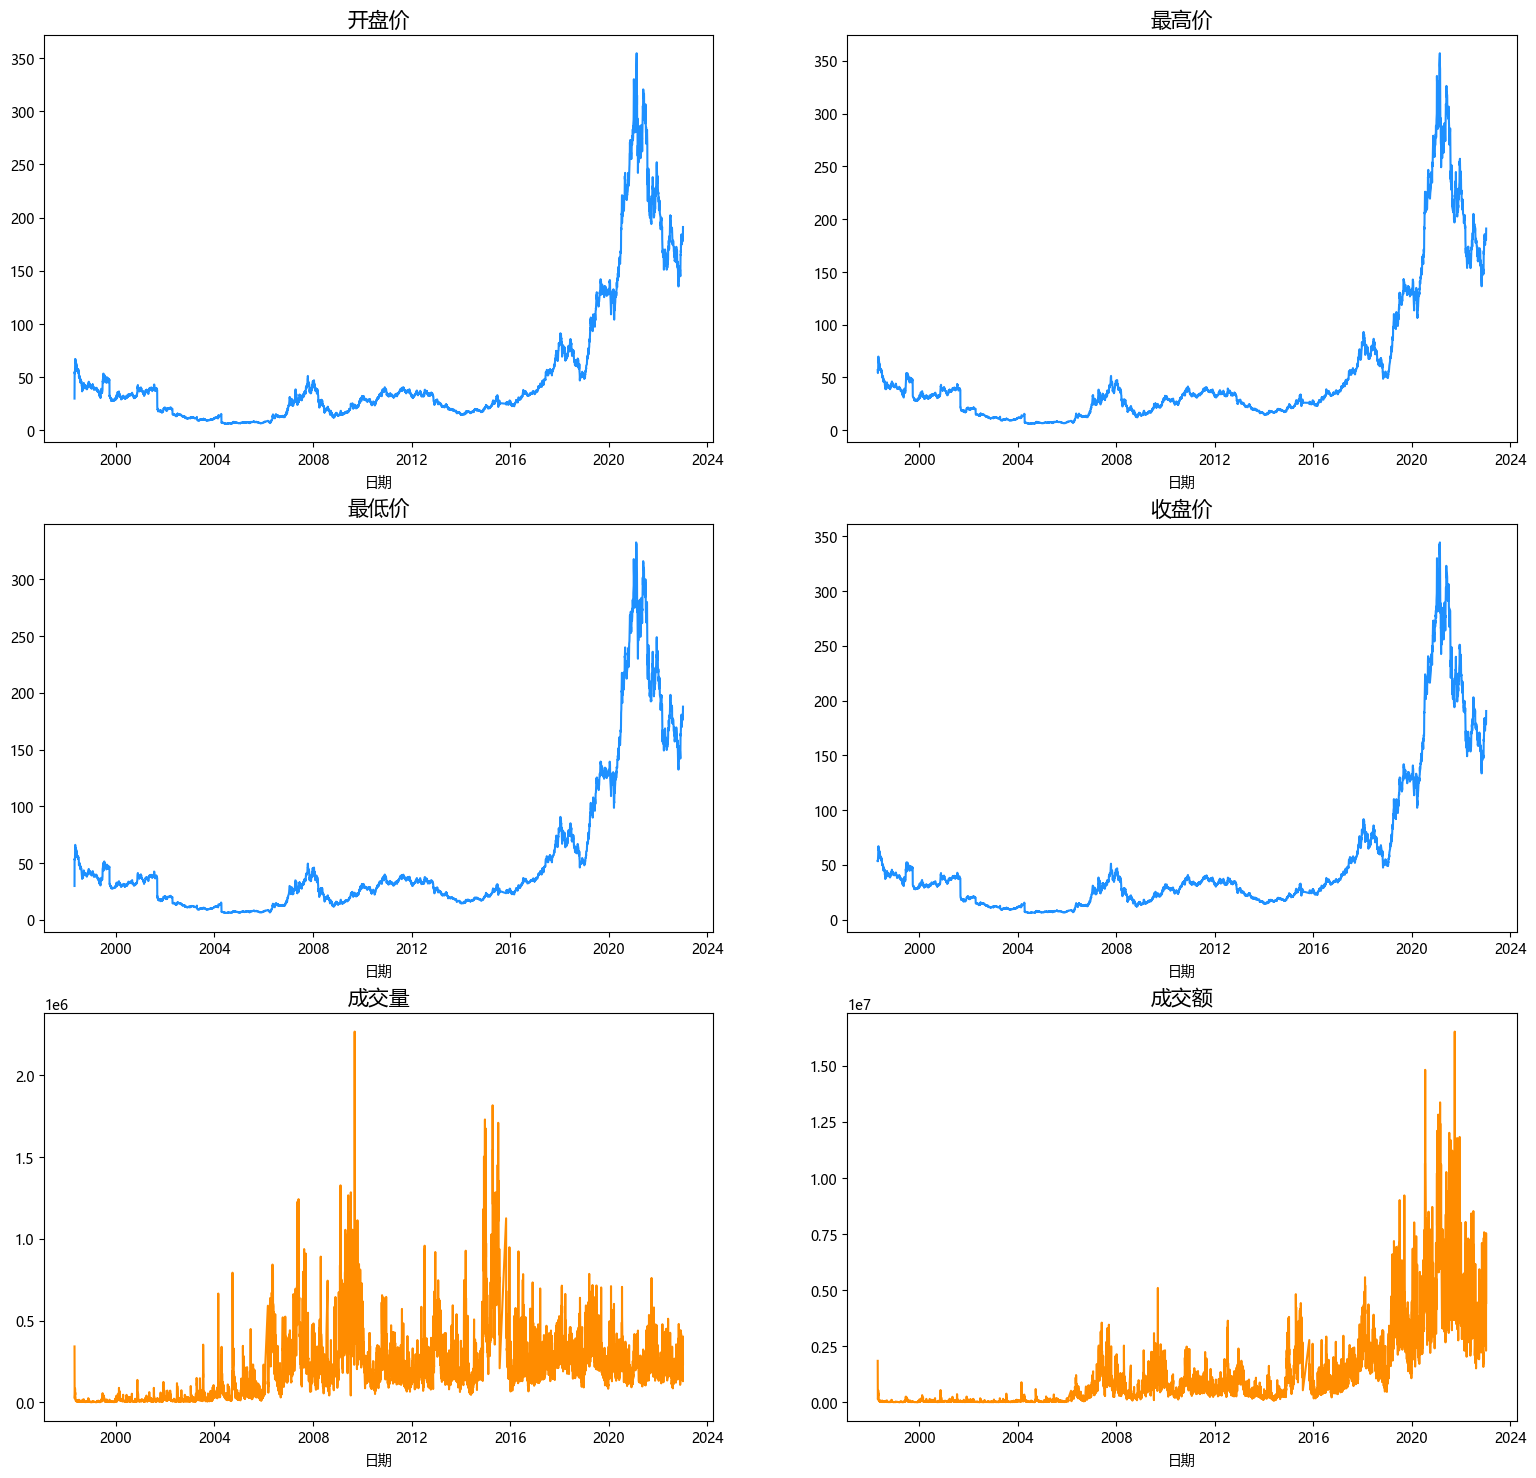

In [6]:
#绘制开盘价 收盘价 最高价 最低价 成交量 成交额时序图
fig,axes = plt.subplots(3,2,figsize=(19,18))  #设置图像大小
variable_selection = ['开盘价','最高价','最低价','收盘价','成交量','成交额']
k = 0
for i in range(3):
    for j in range(2):
        if k<=3:  #股价用一种颜色，成交量与成交额用另外一种颜色
            axes[i,j].plot(df_stock[variable_selection[k]],"dodgerblue")
        else:
            axes[i,j].plot(df_stock[variable_selection[k]],"darkorange")
        axes[i,j].set_title(variable_selection[k],fontsize = 15)
        axes[i,j].set_xlabel('日期',fontsize = 10)
        k += 1

<Figure size 600x600 with 0 Axes>

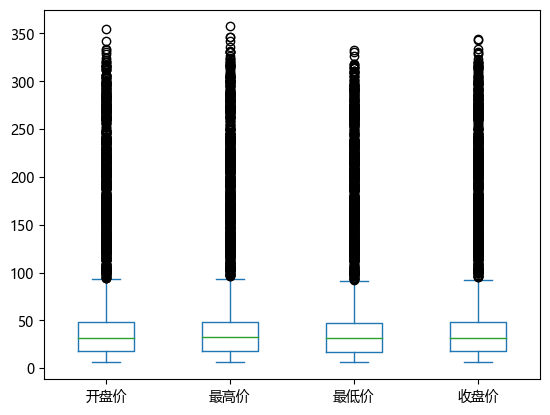

In [7]:
#箱线图
#股价的数字较接近，故一起绘制
fig = plt.figure(figsize=(6,6))
fig = df_stock[variable_selection[:4]].plot(kind='box')

<AxesSubplot: >

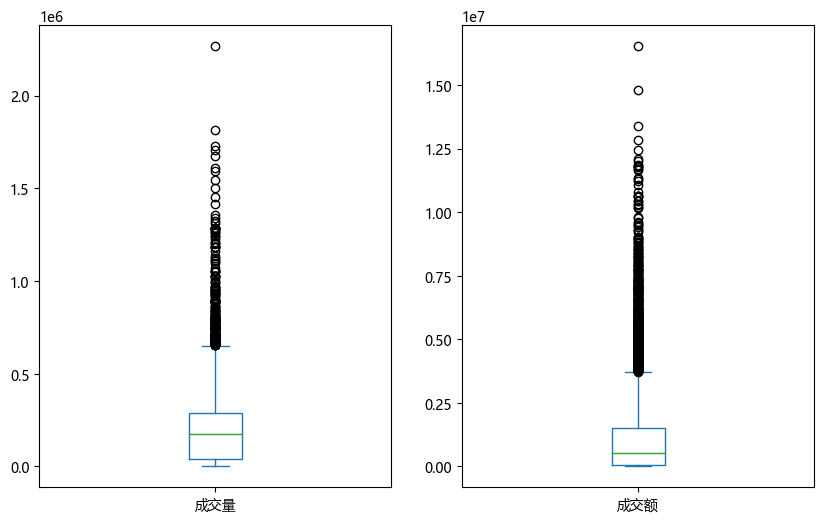

In [8]:
#成交量与成交额箱线图
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,2,1) 
df_stock["成交量"].plot(kind='box')
ax = fig.add_subplot(1,2,2) 
df_stock["成交额"].plot(kind='box')

<Figure size 600x600 with 0 Axes>

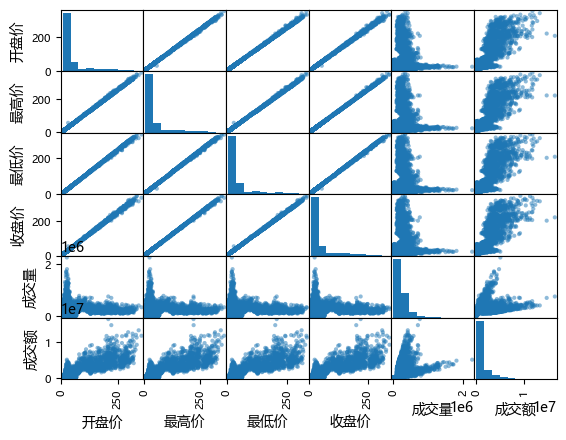

In [9]:
#矩阵散点图
fig = plt.figure(figsize=(6,6))
fig = pd.plotting.scatter_matrix(df_stock[variable_selection]) # 矩阵散点图

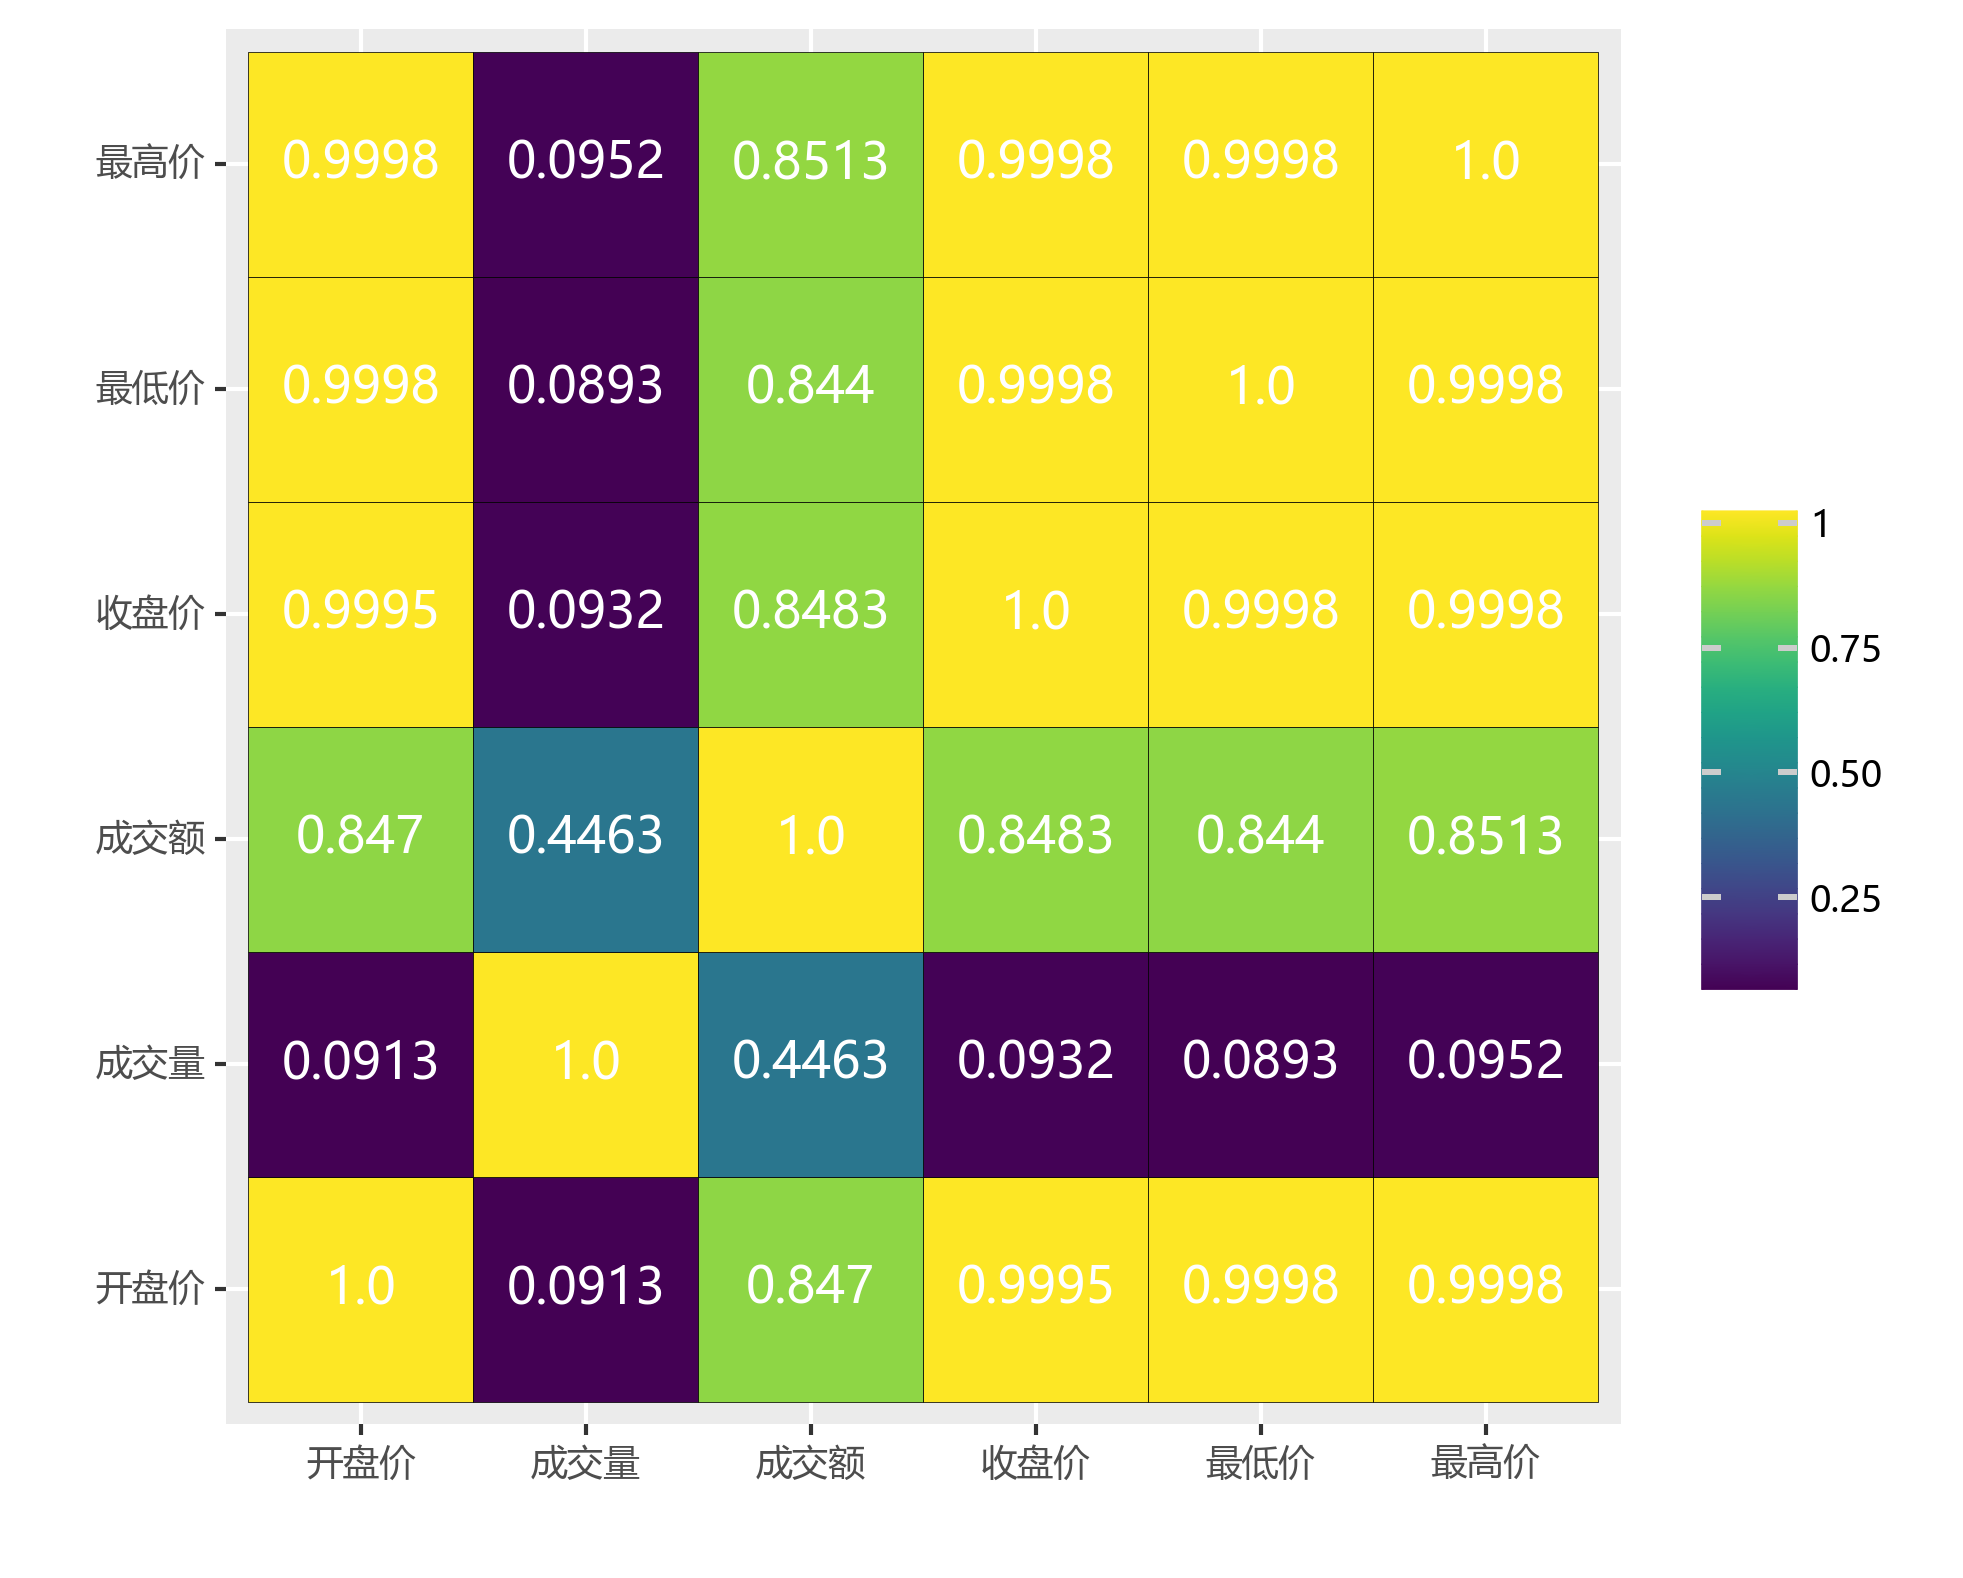

<ggplot: (169364765928)>

In [10]:
#相关关系图
mat_corr=np.round(df_stock[variable_selection].corr(),4).reset_index()
corr_data=pd.melt(mat_corr,id_vars='index',var_name='var',value_name='value')
corr_data['AbsValue']=np.abs(corr_data.value)
corr_data.rename(columns={'index':' ','var':'   '},inplace=True) 
(
    ggplot(corr_data, aes(x=' ', y='   ', fill='value')) +  
    geom_tile(color="black") +
    geom_text(aes(label='value'), size=12,colour="white")+
    scale_fill_cmap(name =' ')+
    coord_equal()+
    theme(dpi=300,figure_size=(6,6),text = element_text(family="Microsoft YaHei"))  #显示中文
)

##  3.ARIMA模型

In [11]:
#导入相关库
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import stattools

In [12]:
#创建异常类IllegalArgumentException
class IllegalArgumentException(Exception):  
    pass

In [13]:
#创建股票类
class Stock:  
    def __init__(self,df):  #构造函数
        self.stock_table = df
        self.price_list = ["开盘价","最高价","最低价","收盘价"]
        
    def pricename_judgement(self,pricename):  #创建方法判断输入的pricename是否在"开盘价"、"最高价"、"最低价"、"收盘价"中
        try:
            if(pricename in self.price_list):  #若输入的pricename在"开盘价"、"最高价"、"最低价"、"收盘价"中
                return 1
            else:  #否则，抛出异常IllegalArgumentException
                raise IllegalArgumentException()
        except:  #捕获异常并显示信息:请从"开盘价"、"最高价"、"最低价"、"收盘价"中选择需要分析的价格！
            print('请从"开盘价"、"最高价"、"最低价"、"收盘价"中选择需要分析的价格！')
            
    def ADF_test(self,d,pricename):  #创建方法进行ADF平稳性检验
        if(self.pricename_judgement(pricename)):  #若pricename在选择范围"开盘价"、"最高价"、"最低价"、"收盘价"中
            try:  
                return adfuller(eval("self.stock_table[pricename]"+d*".diff()"+".dropna()"))[1]  #返回ADF检验对应的p值
            except:  #若d非整数，则会出现异常，故捕获并显示信息:输入的参数d不是整数！
                print("输入的参数d不是整数！")
                
    def ARIMA_order_selection_d(self,pricename):  #创建方法确定ARIMA(p,d,q)模型中d的取值
        if(self.pricename_judgement(pricename)):  #若pricename在选择范围"开盘价"、"最高价"、"最低价"、"收盘价"中
            d = 0
            while(self.ADF_test(d,pricename) >= 0.05):  #当d阶差分对应的p值大于0.05，表明d阶差分后的序列不平稳
                d += 1
                if(d > 20):  #为避免陷入死循环，设置d最大值为20
                    print("在0-20阶范围内差分后的序列无法满足平稳性！")
                    return  #若在0-20阶范围内差分后的序列无法满足平稳性，返回空值
            return d  #若d阶差分后序列平稳，则返回对应的d值
    
    def ARIMA_plot(self,pricename):  #创建方法绘制每一阶差分后序列的时序图、ACF、PACF图
        if(self.pricename_judgement(pricename)):  #若pricename在选择范围"开盘价"、"最高价"、"最低价"、"收盘价"中
            try:  #若self.ARIMA_order_selection_d(pricename)返回值为空，会出现'NoneType'和'int'相加的异常
                fig,axes = plt.subplots(self.ARIMA_order_selection_d(pricename)+1,3,figsize=(16,10*self.ARIMA_order_selection_d(pricename)))  #设置图像大小
                for i in range(self.ARIMA_order_selection_d(pricename)+1):
                    if(i == 0):
                        axes[0,0].plot(self.stock_table[pricename])
                        axes[0,0].set_title('原始序列时序图')
                        axes[0,0].set_xlabel('日期')
                        axes[0,0].set_ylabel(pricename)
                        plot_acf(self.stock_table[pricename],ax = axes[0,1]);
                        plot_pacf(self.stock_table[pricename],ax = axes[0,2]);
                    else:
                        axes[i,0].plot(eval("self.stock_table[pricename]"+i*".diff()"+".dropna()"))
                        axes[i,0].set_title(str(i)+'阶差分序列时序图')
                        axes[i,0].set_xlabel('日期')
                        axes[i,0].set_ylabel(pricename+str(i)+'阶差分')
                        plot_acf(eval("self.stock_table[pricename]"+i*".diff()"+".dropna()"),ax = axes[i,1]);
                        plot_pacf(eval("self.stock_table[pricename]"+i*".diff()"+".dropna()"),ax = axes[i,2]);
            except:  #若出现异常，则表明在0-20阶范围内差分后的序列无法满足平稳性，故输出该信息
                    print("在0-20阶范围内差分后的序列无法满足平稳性！")
                
    def LB_test(self,pricename,d):#创建方法进行d阶差分后序列的LB纯随机性检验
        if(self.pricename_judgement(pricename)):  #若pricename在选择范围"开盘价"、"最高价"、"最低价"、"收盘价"中
            try:
                LjungBox = stattools.q_stat(stattools.acf(eval("self.stock_table[pricename]"+d*".diff()"+".dropna()"))[1:13],len(eval("self.stock_table[pricename]"+d*".diff()"+".dropna()")))[1] 
                print("第1到12个白噪声检验的p值为：\n",LjungBox)  #显示第1到12个白噪声检验的p值
            except:  #若d非整数，则会出现异常，故捕获并显示信息:输入的参数d不是整数！
                print("输入的参数d不是整数！")

In [14]:
#划分训练集和测试集(按8:2比例划分)
train_data = df_stock.iloc[0:int(len(df_stock)*0.8),:]
test_data = df_stock.iloc[int(len(df_stock)*0.8):,:]

#创建五粮液股票训练集的实例
stock_wly_train = Stock(train_data)

#对股票收盘价训练集序列(即差分阶数d=0)进行ADF检验，判断平稳性
print("股票收盘价训练集序列ADF检验的p值为:",stock_wly_train.ADF_test(0,"收盘价"))

股票收盘价训练集序列ADF检验的p值为: 0.6243094677299192


C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


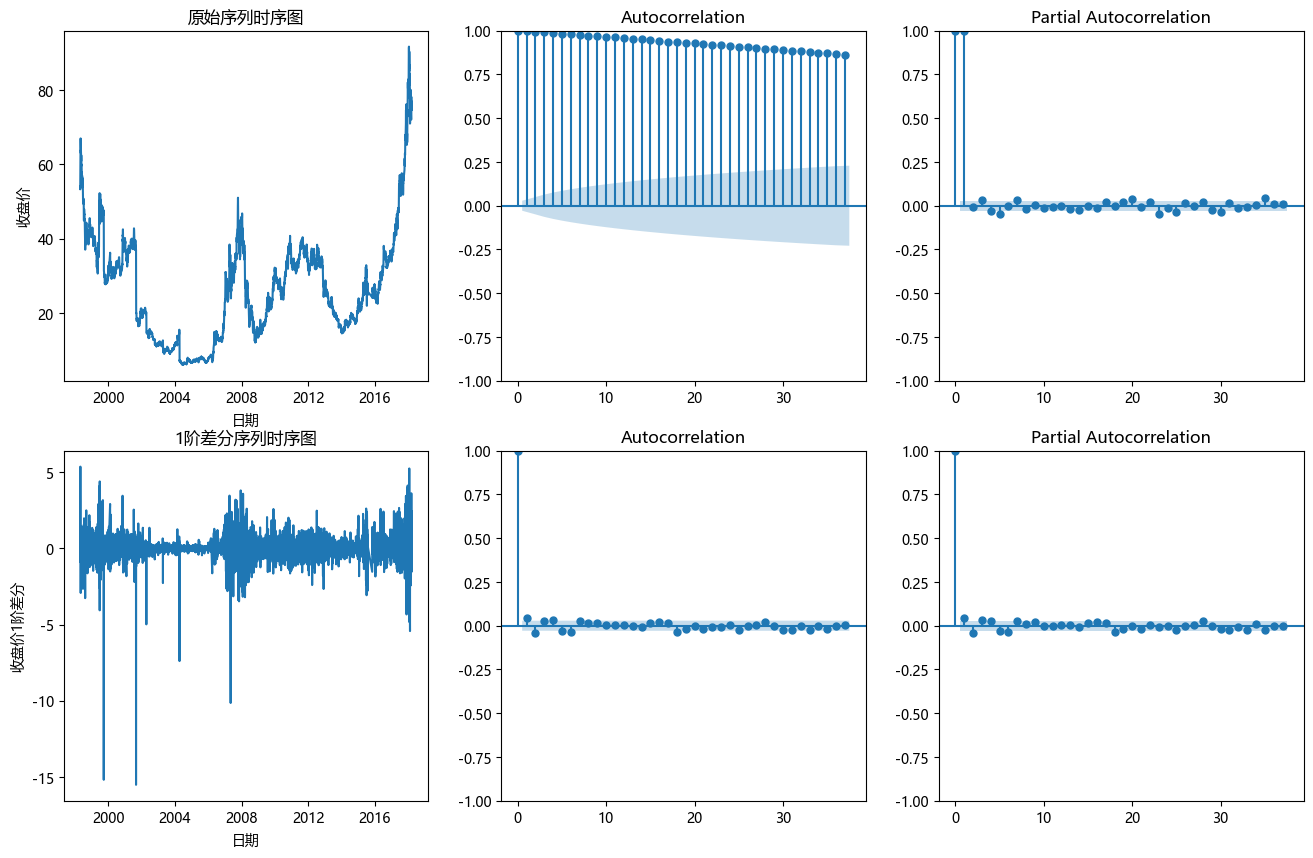

In [15]:
#ADF检验的p值大于0.05，故拒绝原假设，表明股票收盘价序列非平稳，故调用Stock类中的ARIMA_plot方法求解差分阶数d并绘制图像
stock_wly_train.ARIMA_plot("收盘价")

In [16]:
#由图像可知一阶差分后序列平稳且通过了ADF检验，故对一阶差分后序列进行LB纯随机性检验是否为白噪声
stock_wly_train.LB_test("收盘价",1)

第1到12个白噪声检验的p值为：
 [4.55719572e-03 4.27609201e-04 2.74961103e-04 1.16454074e-04
 5.64128449e-05 7.21178160e-06 3.72902947e-06 6.34170575e-06
 9.15240368e-06 2.01748006e-05 4.15653855e-05 7.71374856e-05]


In [17]:
#p值均小于0.05，说明拒绝原假设，即一阶差分后序列不是白噪声，故对原始序列进行ARIMA(p,1,q)建模
#对p,q进行定阶，即尝试p,q在10之内进行遍历，选取最低AIC值模型
import pmdarima as pm
df_arima_train = train_data[['收盘价']]
df_arima_test = test_data[['收盘价']]
model = pm.auto_arima(df_arima_train, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       
                      max_p=10, max_q=10, #p,q的最大值为10
                      m=1,              #无周期性
                      d=1,           #差分阶数为1
                      seasonal=False,   #无季节性
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11446.940, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11458.642, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11452.579, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11451.837, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11456.831, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11446.654, Time=1.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11446.418, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11443.980, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11442.780, Time=0.72 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11440.873, Time=0.96 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=11437.157, Time=1.09 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=11435.695, Time=1.29 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=11437.258, Time=1.74 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=11435.969, Time=6.79 sec
 ARIMA(6,1,1)(0,0,0

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_arima_train, order=(7,1,0))   #ARIMA(7,1,0)对训练集进行拟合
arima_model_fit = model.fit()
print(arima_model_fit.summary()) #输出模型信息

C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


                               SARIMAX Results                                
Dep. Variable:                    收盘价   No. Observations:                 4684
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -5708.937
Date:                Mon, 09 Jan 2023   AIC                          11433.874
Time:                        19:27:25   BIC                          11485.488
Sample:                             0   HQIC                         11452.024
                               - 4684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0443      0.009      4.683      0.000       0.026       0.063
ar.L2         -0.0394      0.010     -4.142      0.000      -0.058      -0.021
ar.L3          0.0290      0.009      3.226      0.0

Text(0.5, 1.0, '标准化残差序列图')

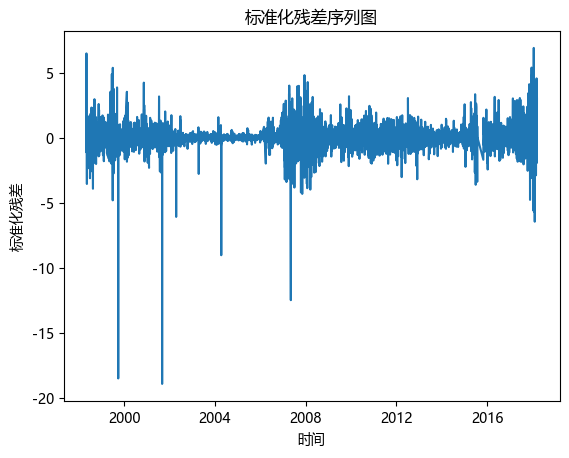

In [19]:
#求残差
#由于进行了一阶差分，故去除第一个个值
residual = arima_model_fit.resid[1:]

#绘制标准化残差图
residual_sigma = math.sqrt(mean((residual - residual.mean())**2))
residual_std = residual/residual_sigma #标准化残差
plt.plot(residual_std) 
plt.xlabel('时间') 
plt.ylabel('标准化残差')
plt.title('标准化残差序列图',loc='center')

In [20]:
#残差序列的白噪声检验
LjungBox1 = stattools.q_stat(stattools.acf(residual)[1:13],len(residual))[1] #显示第1到12个白噪声检验的p值
print("第1到12个白噪声检验的p值为：\n",LjungBox1)

第1到12个白噪声检验的p值为：
 [0.98515061 0.99969208 0.99992068 0.99999705 0.99999983 0.99999999
 1.         0.99998137 0.98646222 0.99352655 0.99708762 0.99853356]


<function matplotlib.pyplot.show(close=None, block=None)>

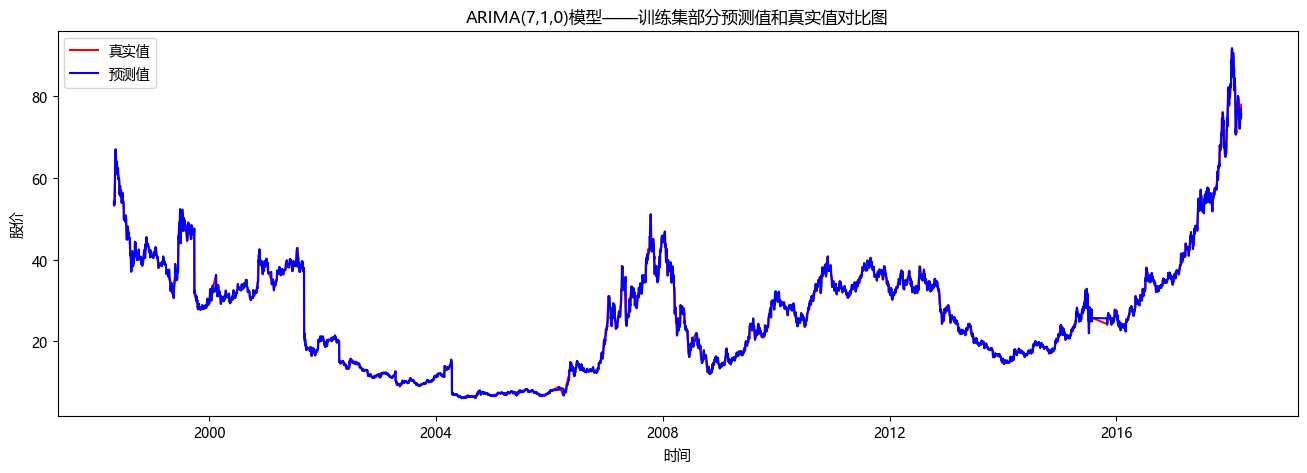

In [21]:
#p值均大于0.05，故不能拒绝原假设，即残差序列是白噪声
#对训练集进行预测，绘制训练集对比图
prediction1 = arima_model_fit.predict()
plt.figure(figsize=(16,5))
plt.plot(df_arima_train[1:],color='red')
plt.plot(prediction1[1:], color='blue')
plt.title("ARIMA(7,1,0)模型——训练集部分预测值和真实值对比图")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

In [22]:
#对测试集集进行预测
#方法1：逐点预测(每次预测时用最新真实值进行修正)
fit_total = [c for c in df_stock["收盘价"]]
forecast_total = []
for i in range(len(df_arima_test)):
    model = ARIMA(fit_total[:len(df_arima_train)+i], order=(7,1,0))  #ARIMA(7,1,0)进行拟合
    arima_model_fit = model.fit()
    forecast_step = list(arima_model_fit.forecast(steps = 1))
    forecast_total.append(forecast_step)

<function matplotlib.pyplot.show(close=None, block=None)>

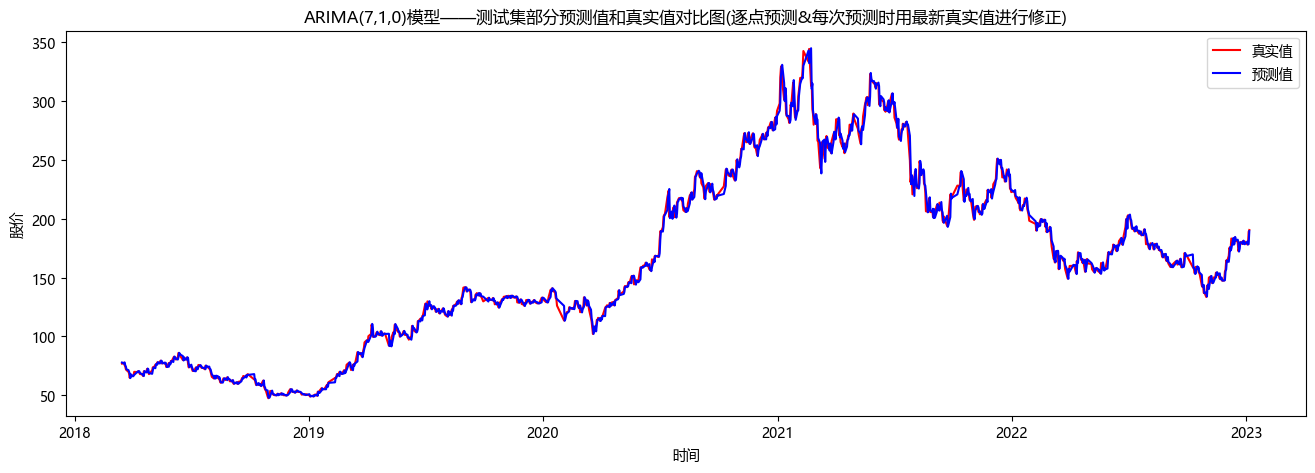

In [23]:
#绘制对比图
prediction2 = pd.DataFrame(forecast_total)
prediction2 = prediction2.set_index(df_arima_test.index)
plt.figure(figsize=(16,5))
plt.plot(df_arima_test,color='red')
plt.plot(prediction2, color='blue')
plt.title("ARIMA(7,1,0)模型——测试集部分预测值和真实值对比图(逐点预测&每次预测时用最新真实值进行修正)")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


<function matplotlib.pyplot.show(close=None, block=None)>

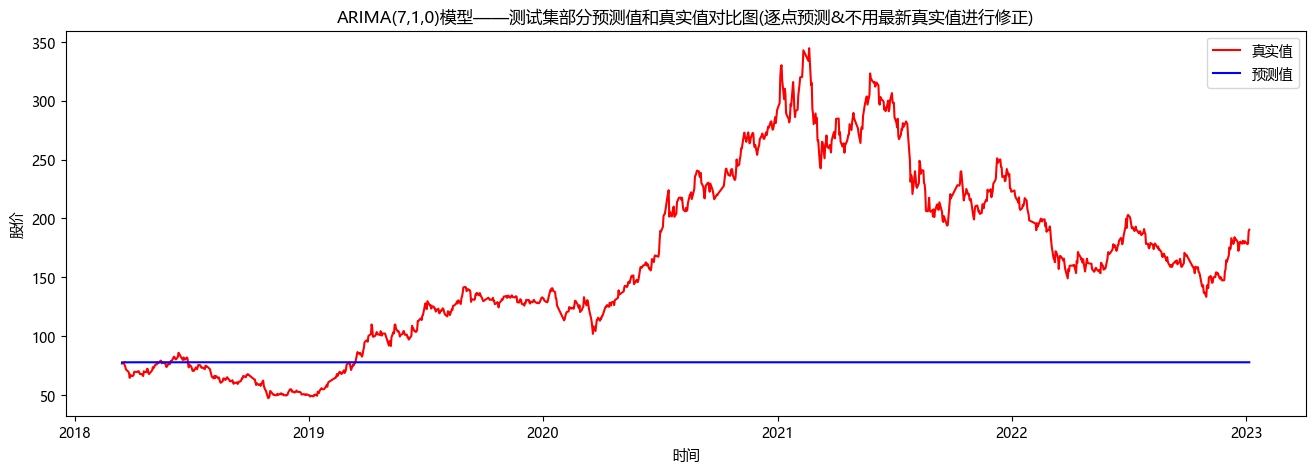

In [24]:
#方法2：逐点预测(每次预测时不进行修正)
model = ARIMA(df_arima_train, order=(7,1,0))   #ARIMA(7,1,0)进行拟合
arima_model_fit = model.fit()
prediction3 = arima_model_fit.forecast(steps = len(df_arima_test))
prediction3 = pd.DataFrame(prediction3)
prediction3 = prediction3.set_index(df_arima_test.index)
plt.figure(figsize=(16,5))
plt.plot(df_arima_test,color='red')
plt.plot(prediction3, color='blue')
plt.title("ARIMA(7,1,0)模型——测试集部分预测值和真实值对比图(逐点预测&不用最新真实值进行修正)")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

C:\Users\Lin Yubo\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.


<function matplotlib.pyplot.show(close=None, block=None)>

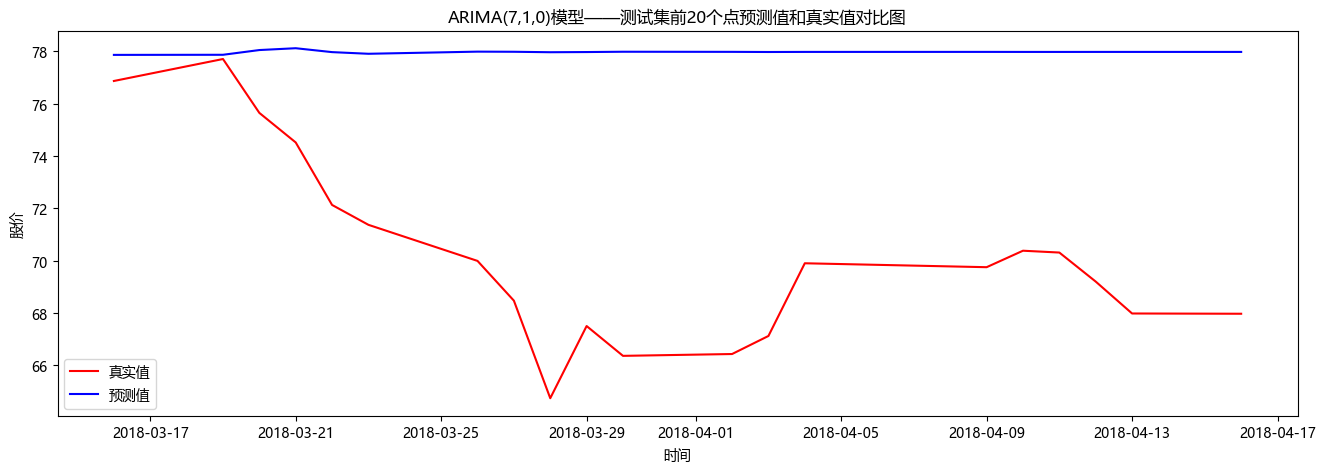

In [25]:
#预测测试集前20个点
prediction4 = arima_model_fit.forecast(steps = 20)
prediction4 = pd.DataFrame(prediction4)
prediction4 = prediction4.set_index(df_arima_test.index[:20])
plt.figure(figsize=(16,5))
plt.plot(df_arima_test[:20],color='red')
plt.plot(prediction4, color='blue')
plt.title("ARIMA(7,1,0)模型——测试集前20个点预测值和真实值对比图")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

## 4.单变量LSTM模型

In [26]:
#导入相关库
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
#原始数据归一化
scaler = MinMaxScaler(feature_range = (0,1))
dataset_total = scaler.fit_transform(df_stock["收盘价"].values.reshape(-1,1))

#(训练数据,标签)类型集合创建函数(100个训练数据对应1个标签)
def set_create(data_set,time_step=100):
    data_part1 , data_part2 = [],[]
    for i in range(len(data_set) - time_step):
        c = data_set[i:(i+time_step)]
        data_part1.append(c)
        data_part2.append(data_set[(i+time_step)])
    return np.array(data_part1),np.array(data_part2)

#划分训练集和测试集(同样按8:2比例划分)
#为保证训练集最后一个小单元标签和测试集第一个小单元标签的连续性，测试集第一个值向后退100个值
train_data_LSTM_std = dataset_total[0:int(len(dataset_total)*0.8)]
test_data_LSTM_std = dataset_total[int(len(dataset_total)*0.8)-100:]

#构造满足LSTM输入的训练/验证集合小单元
train_data_part1_std,train_data_part2_std = set_create(list(train_data_LSTM_std),)
test_data_part1_std,test_data_part2_std = set_create(list(test_data_LSTM_std),)

#为训练集和测试集多加1个维度以满足LSTM输入维度
train_data_part1_std = np.reshape(train_data_part1_std,(train_data_part1_std.shape[0],train_data_part1_std.shape[1],1))
test_data_part1_std = np.reshape(test_data_part1_std,(test_data_part1_std.shape[0],test_data_part1_std.shape[1],1))

#搜寻每个参数对应的收敛epochs值
LSTM_layers_selection = [50,80,100]  #LSTM层存储单元数待选范围
batch_size_selection = [50,100,200]  #batch_size待选范围

#创建dataframe列表存储训练结果
df_LSTM_result = pd.DataFrame()
df_LSTM_result["epochs"] = range(1,601)
filler = np.nan

#创建dataframe列表存储训练集预测结果
df_LSTM_trainpre_result = pd.DataFrame()
df_LSTM_trainpre_result["日期"] = df_stock.iloc[0:int(len(df_stock)*0.8)].index[100:]
df_LSTM_trainpre_result = df_LSTM_trainpre_result.set_index(df_stock.iloc[0:int(len(df_stock)*0.8)].index[100:])

#创建dataframe列表存储测试集预测结果
df_LSTM_testpre_result = pd.DataFrame()
df_LSTM_testpre_result["日期"] = df_stock.iloc[int(len(df_stock)*0.8):].index
df_LSTM_testpre_result = df_LSTM_testpre_result.set_index(df_stock.iloc[int(len(df_stock)*0.8):].index)

In [28]:
#寻找最优参数
for i in LSTM_layers_selection:
    for j in batch_size_selection:
            model = Sequential()
            model.add(LSTM(i,return_sequences = False,input_shape = (100,1)))  #添加一层LSTM，LSTM层存储单元数为i
            model.add(Dense(1))  #全连接层设置1个存储单元
            model.compile(loss = 'mean_squared_error',optimizer='adam')  #损失函数选择MSE，优化算法选择Adam算法
            print(model.summary())
            es = EarlyStopping(monitor = 'loss', min_delta = 1e-6,patience = 50)  #提前终止条件（当连续50个训练集loss之差小于1e-6），避免过拟合
            training_history = model.fit(train_data_part1_std,train_data_part2_std,validation_data=(test_data_part1_std,test_data_part2_std),epochs=600,batch_size=j,verbose=1,callbacks=[es])  #设置较大epochs保证收敛
            
            df_LSTM_result["LSTM="+str(i)+",batch_size="+str(j)+"  loss"] = training_history.history["loss"] + [filler]*(len(df_LSTM_result) - len(training_history.history["loss"]))
            df_LSTM_result["LSTM="+str(i)+",batch_size="+str(j)+"  val_loss"] = training_history.history["val_loss"] + [filler]*(len(df_LSTM_result) - len(training_history.history["val_loss"]))
            
            train_predict_std = model.predict(train_data_part1_std).reshape(-1,1)  #预测训练集数据
            train_predict_inversed = scaler.inverse_transform(train_predict_std)  #将预测结果还原得到真实预测值
            df_LSTM_trainpre_result["LSTM="+str(i)+",batch_size="+str(j)] = train_predict_inversed.flatten()  #存储训练集预测结果
            test_predict_std = model.predict(test_data_part1_std).reshape(-1,1)  #预测测试集数据
            test_predict_inversed = scaler.inverse_transform(test_predict_std)  #将预测结果还原得到真实预测值
            df_LSTM_testpre_result["LSTM="+str(i)+",batch_size="+str(j)] = test_predict_inversed.flatten()  #存储测试集预测结果

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
92/92 [==============================] - 6s 39ms/step - loss: 4.3468e-04 - val_loss: 0.0037
Epoch 2/600
92/92 [==============================] - 3s 34ms/step - loss: 2.9309e-05 - val_loss: 0.0016
Epoch 3/600
92/92 [==============================] - 3s 35ms/step - loss: 2.6529e-05 - val_loss: 8.4258e-04
Epoch 4/600
92/92 [==============================] - 3s 35ms/step - loss: 2.4413e-05 - val_loss: 7.5774e-04
Epoch 5/600
92/92 [==============================] - 3s 36ms/step - loss: 2.2990e-05 

Epoch 42/600
46/46 [==============================] - 2s 53ms/step - loss: 1.0712e-05 - val_loss: 3.1781e-04
Epoch 43/600
46/46 [==============================] - 3s 55ms/step - loss: 1.0727e-05 - val_loss: 3.3541e-04
Epoch 44/600
46/46 [==============================] - 2s 54ms/step - loss: 1.0303e-05 - val_loss: 3.3096e-04
Epoch 45/600
46/46 [==============================] - 2s 53ms/step - loss: 1.0023e-05 - val_loss: 3.0447e-04
Epoch 46/600
46/46 [==============================] - 2s 53ms/step - loss: 1.1022e-05 - val_loss: 3.2072e-04
Epoch 47/600
46/46 [==============================] - 2s 54ms/step - loss: 1.0319e-05 - val_loss: 2.9257e-04
Epoch 48/600
46/46 [==============================] - 2s 54ms/step - loss: 1.0103e-05 - val_loss: 2.8772e-04
Epoch 49/600
46/46 [==============================] - 3s 55ms/step - loss: 9.7815e-06 - val_loss: 3.3216e-04
Epoch 50/600
46/46 [==============================] - 2s 53ms/step - loss: 1.0115e-05 - val_loss: 2.8190e-04
Epoch 51/600
46/46 

46/46 [==============================] - 2s 53ms/step - loss: 6.8615e-06 - val_loss: 1.9095e-04
Epoch 118/600
46/46 [==============================] - 2s 53ms/step - loss: 6.7445e-06 - val_loss: 1.8971e-04
Epoch 119/600
46/46 [==============================] - 2s 53ms/step - loss: 6.2895e-06 - val_loss: 2.0723e-04
Epoch 120/600
46/46 [==============================] - 2s 54ms/step - loss: 6.5547e-06 - val_loss: 1.9820e-04
Epoch 121/600
46/46 [==============================] - 3s 55ms/step - loss: 6.5644e-06 - val_loss: 2.0982e-04
Epoch 122/600
46/46 [==============================] - 2s 53ms/step - loss: 6.8252e-06 - val_loss: 1.8856e-04
Epoch 123/600
46/46 [==============================] - 3s 55ms/step - loss: 7.0016e-06 - val_loss: 1.9802e-04
Epoch 124/600
46/46 [==============================] - 3s 55ms/step - loss: 6.4063e-06 - val_loss: 1.9742e-04
Epoch 125/600
46/46 [==============================] - 3s 56ms/step - loss: 6.4581e-06 - val_loss: 1.9215e-04
Epoch 126/600
46/46 [===

23/23 [==============================] - 2s 76ms/step - loss: 9.5374e-06 - val_loss: 3.1230e-04
Epoch 107/600
23/23 [==============================] - 2s 74ms/step - loss: 9.3766e-06 - val_loss: 3.0695e-04
Epoch 108/600
23/23 [==============================] - 2s 74ms/step - loss: 9.6391e-06 - val_loss: 5.0740e-04
Epoch 109/600
23/23 [==============================] - 2s 74ms/step - loss: 9.5400e-06 - val_loss: 3.3282e-04
Epoch 110/600
23/23 [==============================] - 2s 90ms/step - loss: 9.1137e-06 - val_loss: 4.3217e-04
Epoch 111/600
23/23 [==============================] - 2s 81ms/step - loss: 9.0555e-06 - val_loss: 3.2815e-04
Epoch 112/600
23/23 [==============================] - 2s 78ms/step - loss: 8.8937e-06 - val_loss: 3.0470e-04
Epoch 113/600
23/23 [==============================] - 2s 77ms/step - loss: 8.9829e-06 - val_loss: 2.8021e-04
Epoch 114/600
23/23 [==============================] - 2s 76ms/step - loss: 9.4715e-06 - val_loss: 3.3457e-04
Epoch 115/600
23/23 [===

92/92 [==============================] - 5s 50ms/step - loss: 6.8948e-06 - val_loss: 1.9871e-04
Epoch 46/600
92/92 [==============================] - 5s 51ms/step - loss: 6.6566e-06 - val_loss: 1.9471e-04
Epoch 47/600
92/92 [==============================] - 5s 51ms/step - loss: 6.6318e-06 - val_loss: 2.3488e-04
Epoch 48/600
92/92 [==============================] - 5s 53ms/step - loss: 6.4427e-06 - val_loss: 2.0613e-04
Epoch 49/600
92/92 [==============================] - 5s 52ms/step - loss: 7.1366e-06 - val_loss: 1.9210e-04
Epoch 50/600
92/92 [==============================] - 5s 50ms/step - loss: 6.2714e-06 - val_loss: 1.9021e-04
Epoch 51/600
92/92 [==============================] - 5s 51ms/step - loss: 6.4015e-06 - val_loss: 1.9164e-04
Epoch 52/600
92/92 [==============================] - 5s 50ms/step - loss: 6.5534e-06 - val_loss: 2.0815e-04
Epoch 53/600
92/92 [==============================] - 5s 51ms/step - loss: 6.6975e-06 - val_loss: 2.2947e-04
Epoch 54/600
92/92 [============

Epoch 22/600
46/46 [==============================] - 3s 68ms/step - loss: 1.5117e-05 - val_loss: 5.4323e-04
Epoch 23/600
46/46 [==============================] - 3s 68ms/step - loss: 1.4517e-05 - val_loss: 4.5784e-04
Epoch 24/600
46/46 [==============================] - 3s 69ms/step - loss: 1.4799e-05 - val_loss: 4.4426e-04
Epoch 25/600
46/46 [==============================] - 3s 68ms/step - loss: 1.5154e-05 - val_loss: 4.3198e-04
Epoch 26/600
46/46 [==============================] - 3s 69ms/step - loss: 1.3716e-05 - val_loss: 4.2098e-04
Epoch 27/600
46/46 [==============================] - 3s 68ms/step - loss: 1.3307e-05 - val_loss: 4.3975e-04
Epoch 28/600
46/46 [==============================] - 3s 71ms/step - loss: 1.3860e-05 - val_loss: 4.0129e-04
Epoch 29/600
46/46 [==============================] - 3s 69ms/step - loss: 1.3026e-05 - val_loss: 4.8080e-04
Epoch 30/600
46/46 [==============================] - 3s 67ms/step - loss: 1.3035e-05 - val_loss: 4.5627e-04
Epoch 31/600
46/46 

23/23 [==============================] - 2s 97ms/step - loss: 1.4266e-05 - val_loss: 4.7008e-04
Epoch 42/600
23/23 [==============================] - 2s 97ms/step - loss: 1.4391e-05 - val_loss: 4.6555e-04
Epoch 43/600
23/23 [==============================] - 2s 98ms/step - loss: 1.4424e-05 - val_loss: 4.9061e-04
Epoch 44/600
23/23 [==============================] - 2s 103ms/step - loss: 1.4018e-05 - val_loss: 4.7343e-04
Epoch 45/600
23/23 [==============================] - 2s 98ms/step - loss: 1.4046e-05 - val_loss: 4.6311e-04A: 1s - lo
Epoch 46/600
23/23 [==============================] - 2s 99ms/step - loss: 1.3516e-05 - val_loss: 4.4311e-04
Epoch 47/600
23/23 [==============================] - 2s 98ms/step - loss: 1.3706e-05 - val_loss: 4.3923e-04
Epoch 48/600
23/23 [==============================] - 2s 107ms/step - loss: 1.3434e-05 - val_loss: 4.4086e-04
Epoch 49/600
23/23 [==============================] - 2s 108ms/step - loss: 1.4129e-05 - val_loss: 4.4757e-04
Epoch 50/600
23/23 

Epoch 189/600
23/23 [==============================] - 2s 100ms/step - loss: 6.1633e-06 - val_loss: 1.9839e-04
Epoch 190/600
23/23 [==============================] - 2s 100ms/step - loss: 6.6595e-06 - val_loss: 2.1358e-04
Epoch 191/600
23/23 [==============================] - 2s 101ms/step - loss: 6.4259e-06 - val_loss: 1.8997e-04
Epoch 192/600
23/23 [==============================] - 2s 102ms/step - loss: 6.2093e-06 - val_loss: 1.8963e-04
Epoch 193/600
23/23 [==============================] - 2s 100ms/step - loss: 6.1487e-06 - val_loss: 1.9310e-04
Epoch 194/600
23/23 [==============================] - 2s 101ms/step - loss: 6.3370e-06 - val_loss: 1.9837e-04
Epoch 195/600
23/23 [==============================] - 2s 100ms/step - loss: 6.6166e-06 - val_loss: 1.8906e-04
Epoch 196/600
23/23 [==============================] - 2s 102ms/step - loss: 6.1508e-06 - val_loss: 1.9359e-04
Epoch 197/600
23/23 [==============================] - 2s 101ms/step - loss: 6.0446e-06 - val_loss: 1.9187e-04
E

46/46 [==============================] - 4s 89ms/step - loss: 2.6812e-05 - val_loss: 9.7689e-04
Epoch 4/600
46/46 [==============================] - 4s 88ms/step - loss: 2.5559e-05 - val_loss: 8.5540e-04
Epoch 5/600
46/46 [==============================] - 4s 89ms/step - loss: 2.5270e-05 - val_loss: 7.8061e-04
Epoch 6/600
46/46 [==============================] - 4s 89ms/step - loss: 2.3211e-05 - val_loss: 7.1264e-04
Epoch 7/600
46/46 [==============================] - 4s 89ms/step - loss: 2.2897e-05 - val_loss: 7.2465e-04
Epoch 8/600
46/46 [==============================] - 4s 89ms/step - loss: 2.1481e-05 - val_loss: 6.9680e-04
Epoch 9/600
46/46 [==============================] - 4s 92ms/step - loss: 2.0487e-05 - val_loss: 6.8861e-04
Epoch 10/600
46/46 [==============================] - 4s 91ms/step - loss: 1.9748e-05 - val_loss: 6.3269e-04
Epoch 11/600
46/46 [==============================] - 4s 90ms/step - loss: 1.9048e-05 - val_loss: 6.4057e-04
Epoch 12/600
46/46 [==================

Epoch 153/600
46/46 [==============================] - 4s 89ms/step - loss: 6.0187e-06 - val_loss: 1.8935e-04
Epoch 154/600
46/46 [==============================] - 4s 91ms/step - loss: 6.0582e-06 - val_loss: 2.0293e-04
Epoch 155/600
46/46 [==============================] - 4s 89ms/step - loss: 6.3440e-06 - val_loss: 1.9012e-04
Epoch 156/600
46/46 [==============================] - 4s 89ms/step - loss: 6.6360e-06 - val_loss: 1.8781e-04
Epoch 157/600
46/46 [==============================] - 4s 89ms/step - loss: 6.6572e-06 - val_loss: 1.8825e-04
Epoch 158/600
46/46 [==============================] - 4s 89ms/step - loss: 6.1162e-06 - val_loss: 1.8787e-04
Epoch 159/600
46/46 [==============================] - 4s 89ms/step - loss: 5.9994e-06 - val_loss: 1.8811e-04
Epoch 160/600
46/46 [==============================] - 4s 91ms/step - loss: 6.1830e-06 - val_loss: 1.8916e-04
Epoch 161/600
46/46 [==============================] - 4s 90ms/step - loss: 6.0293e-06 - val_loss: 1.8907e-04
Epoch 162/

Epoch 50/600
23/23 [==============================] - 3s 126ms/step - loss: 1.2669e-05 - val_loss: 4.0597e-04
Epoch 51/600
23/23 [==============================] - 3s 123ms/step - loss: 1.2602e-05 - val_loss: 4.0391e-04
Epoch 52/600
23/23 [==============================] - 3s 123ms/step - loss: 1.2439e-05 - val_loss: 4.0259e-04
Epoch 53/600
23/23 [==============================] - 3s 126ms/step - loss: 1.2377e-05 - val_loss: 3.9167e-04
Epoch 54/600
23/23 [==============================] - 3s 127ms/step - loss: 1.1991e-05 - val_loss: 3.8769e-04
Epoch 55/600
23/23 [==============================] - 3s 128ms/step - loss: 1.1991e-05 - val_loss: 4.4012e-04
Epoch 56/600
23/23 [==============================] - 3s 125ms/step - loss: 1.1793e-05 - val_loss: 3.8953e-04
Epoch 57/600
23/23 [==============================] - 3s 124ms/step - loss: 1.1746e-05 - val_loss: 3.7802e-04
Epoch 58/600
23/23 [==============================] - 3s 124ms/step - loss: 1.1738e-05 - val_loss: 3.7307e-04
Epoch 59/6

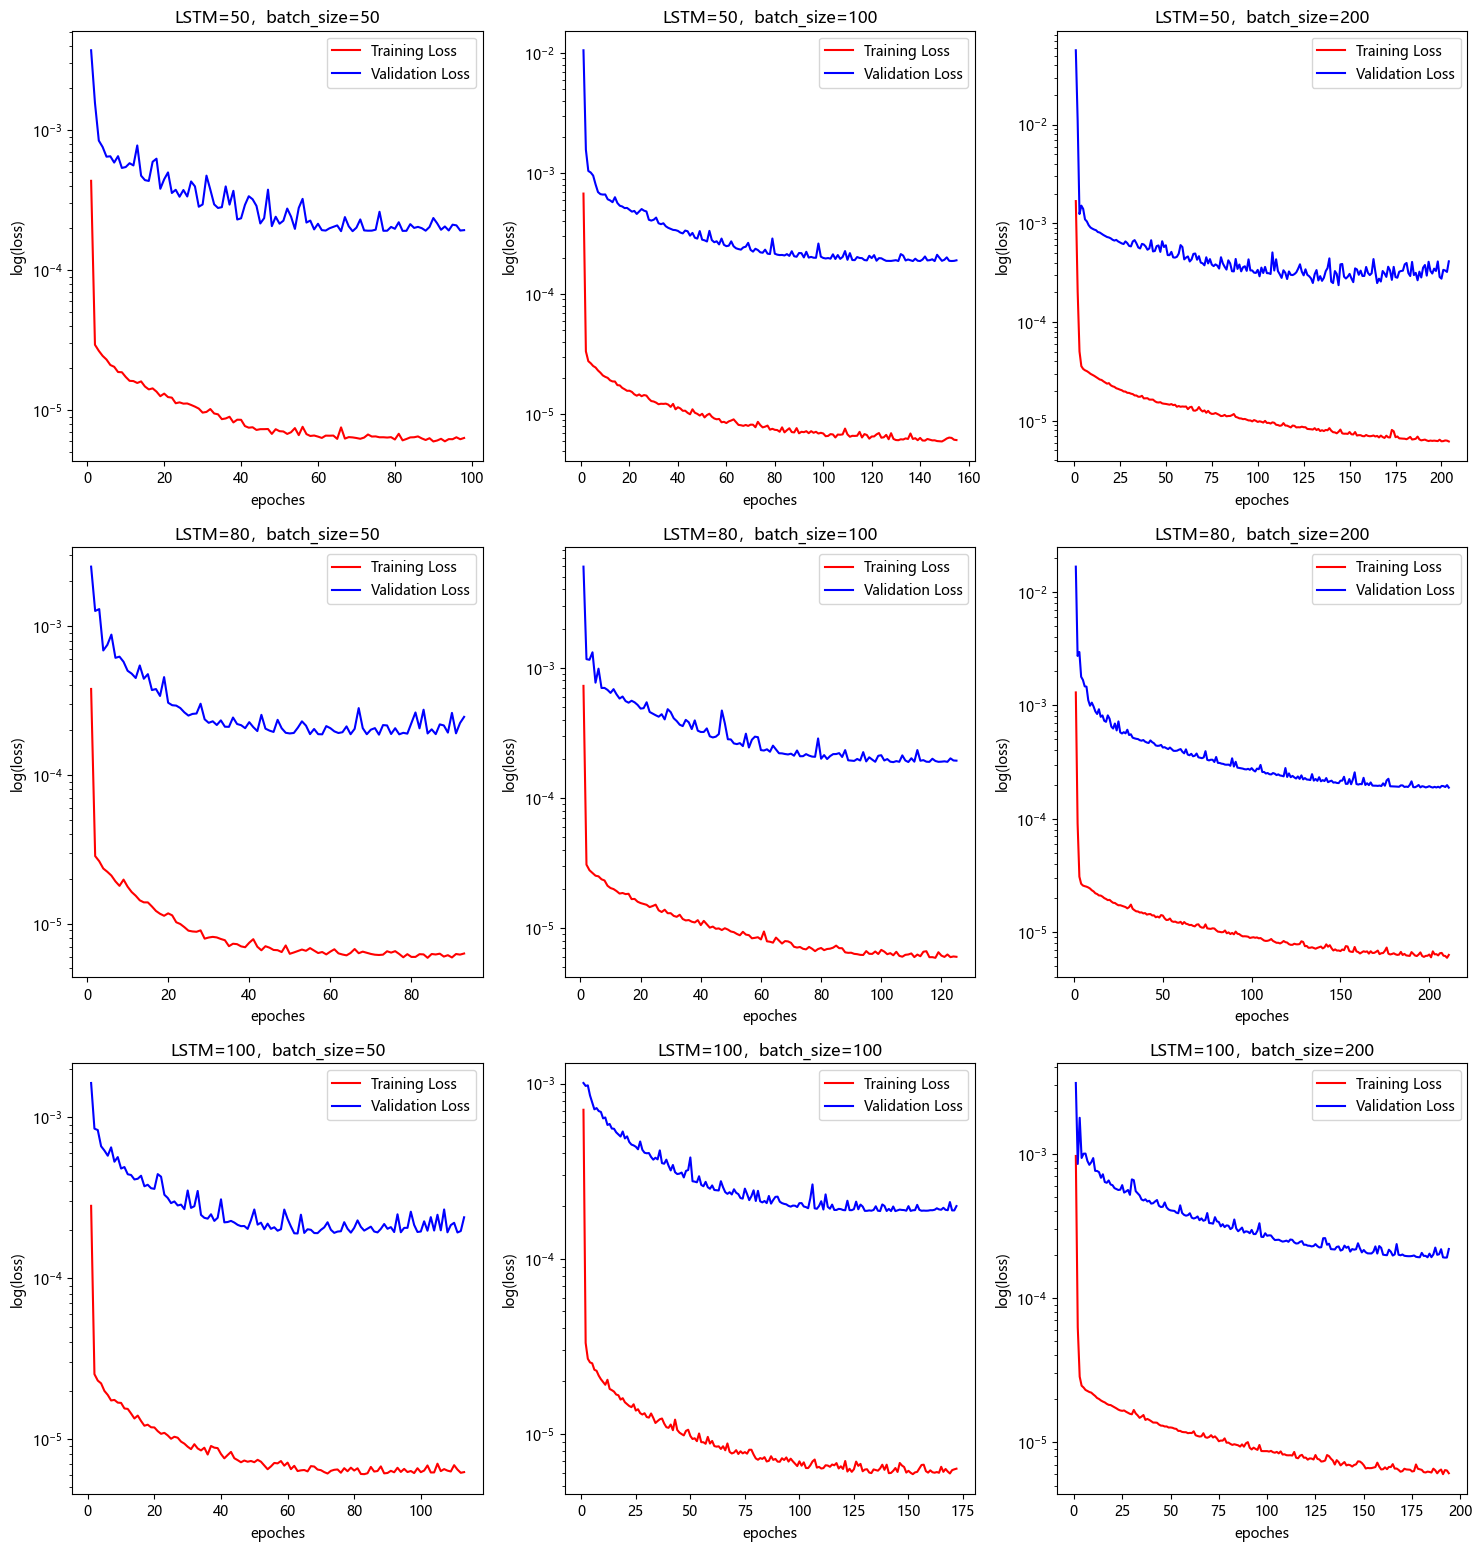

In [29]:
#调参过程可视化
#不同参数取值下epoches - log(loss)图
fig,axes = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
for i in range(3):
    for j in range(3):
        axes[i,j].semilogy(df_LSTM_result["epochs"],df_LSTM_result["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])+"  loss"],"r")
        axes[i,j].semilogy(df_LSTM_result["epochs"],df_LSTM_result["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])+"  val_loss"],"b")
        axes[i,j].legend(["Training Loss","Validation Loss"],loc = 1)
        axes[i,j].set_title("LSTM="+str(LSTM_layers_selection[i])+"，batch_size="+str(batch_size_selection[j]))
        axes[i,j].set_xlabel('epoches')
        axes[i,j].set_ylabel('log(loss)')

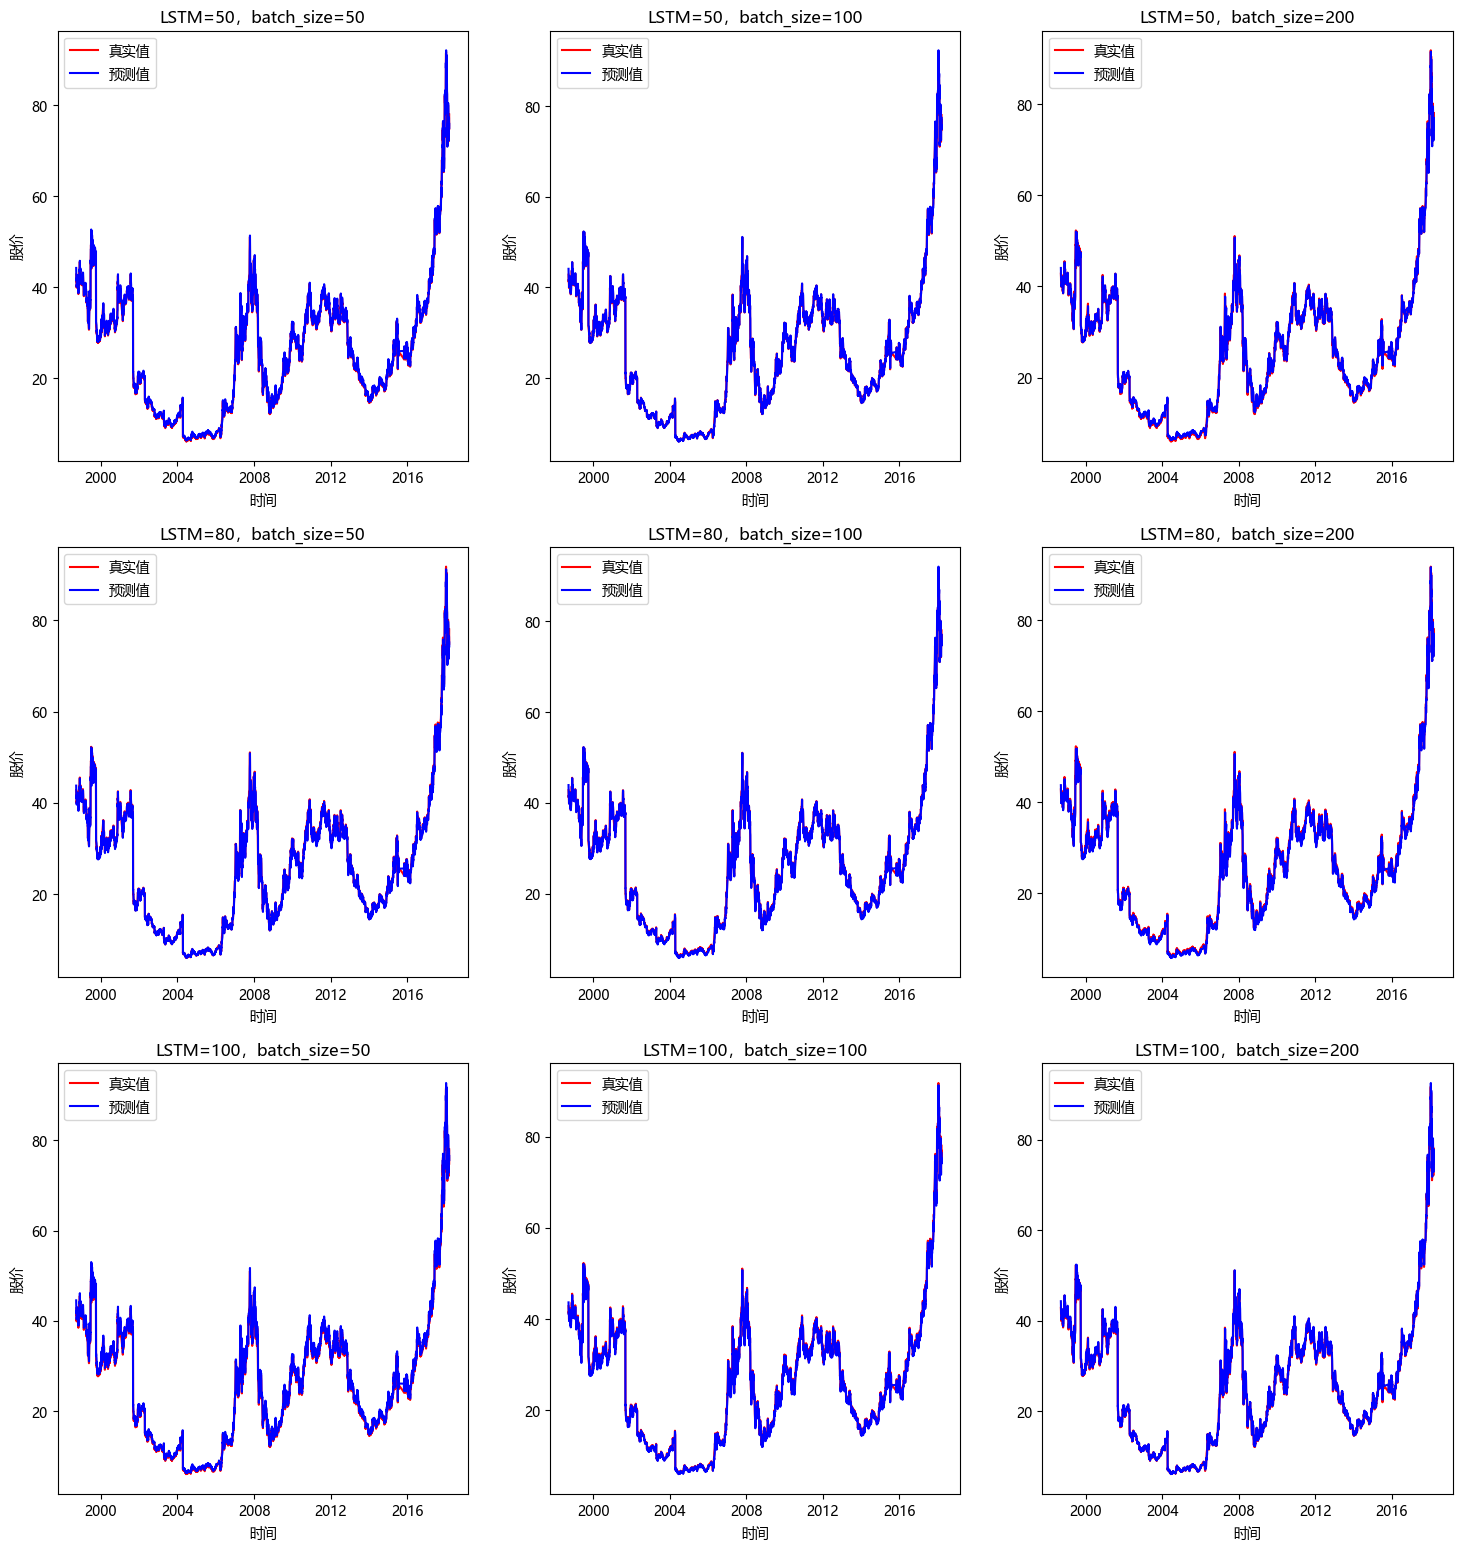

In [30]:
#不同参数取值下训练集预测值和真实值图
fig2,axes2 = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
train_data_LSTM_table = df_stock["收盘价"].iloc[100:int(len(df_stock)*0.8)]
for i in range(3):
    for j in range(3):
        train_predict_table = pd.DataFrame(df_LSTM_trainpre_result["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])])
        axes2[i,j].plot(train_data_LSTM_table,"r")
        axes2[i,j].plot(train_predict_table,"b")
        axes2[i,j].legend(["真实值","预测值"],loc = 2)
        axes2[i,j].set_title("LSTM="+str(LSTM_layers_selection[i])+"，batch_size="+str(batch_size_selection[j]))
        axes2[i,j].set_xlabel('时间')
        axes2[i,j].set_ylabel('股价')

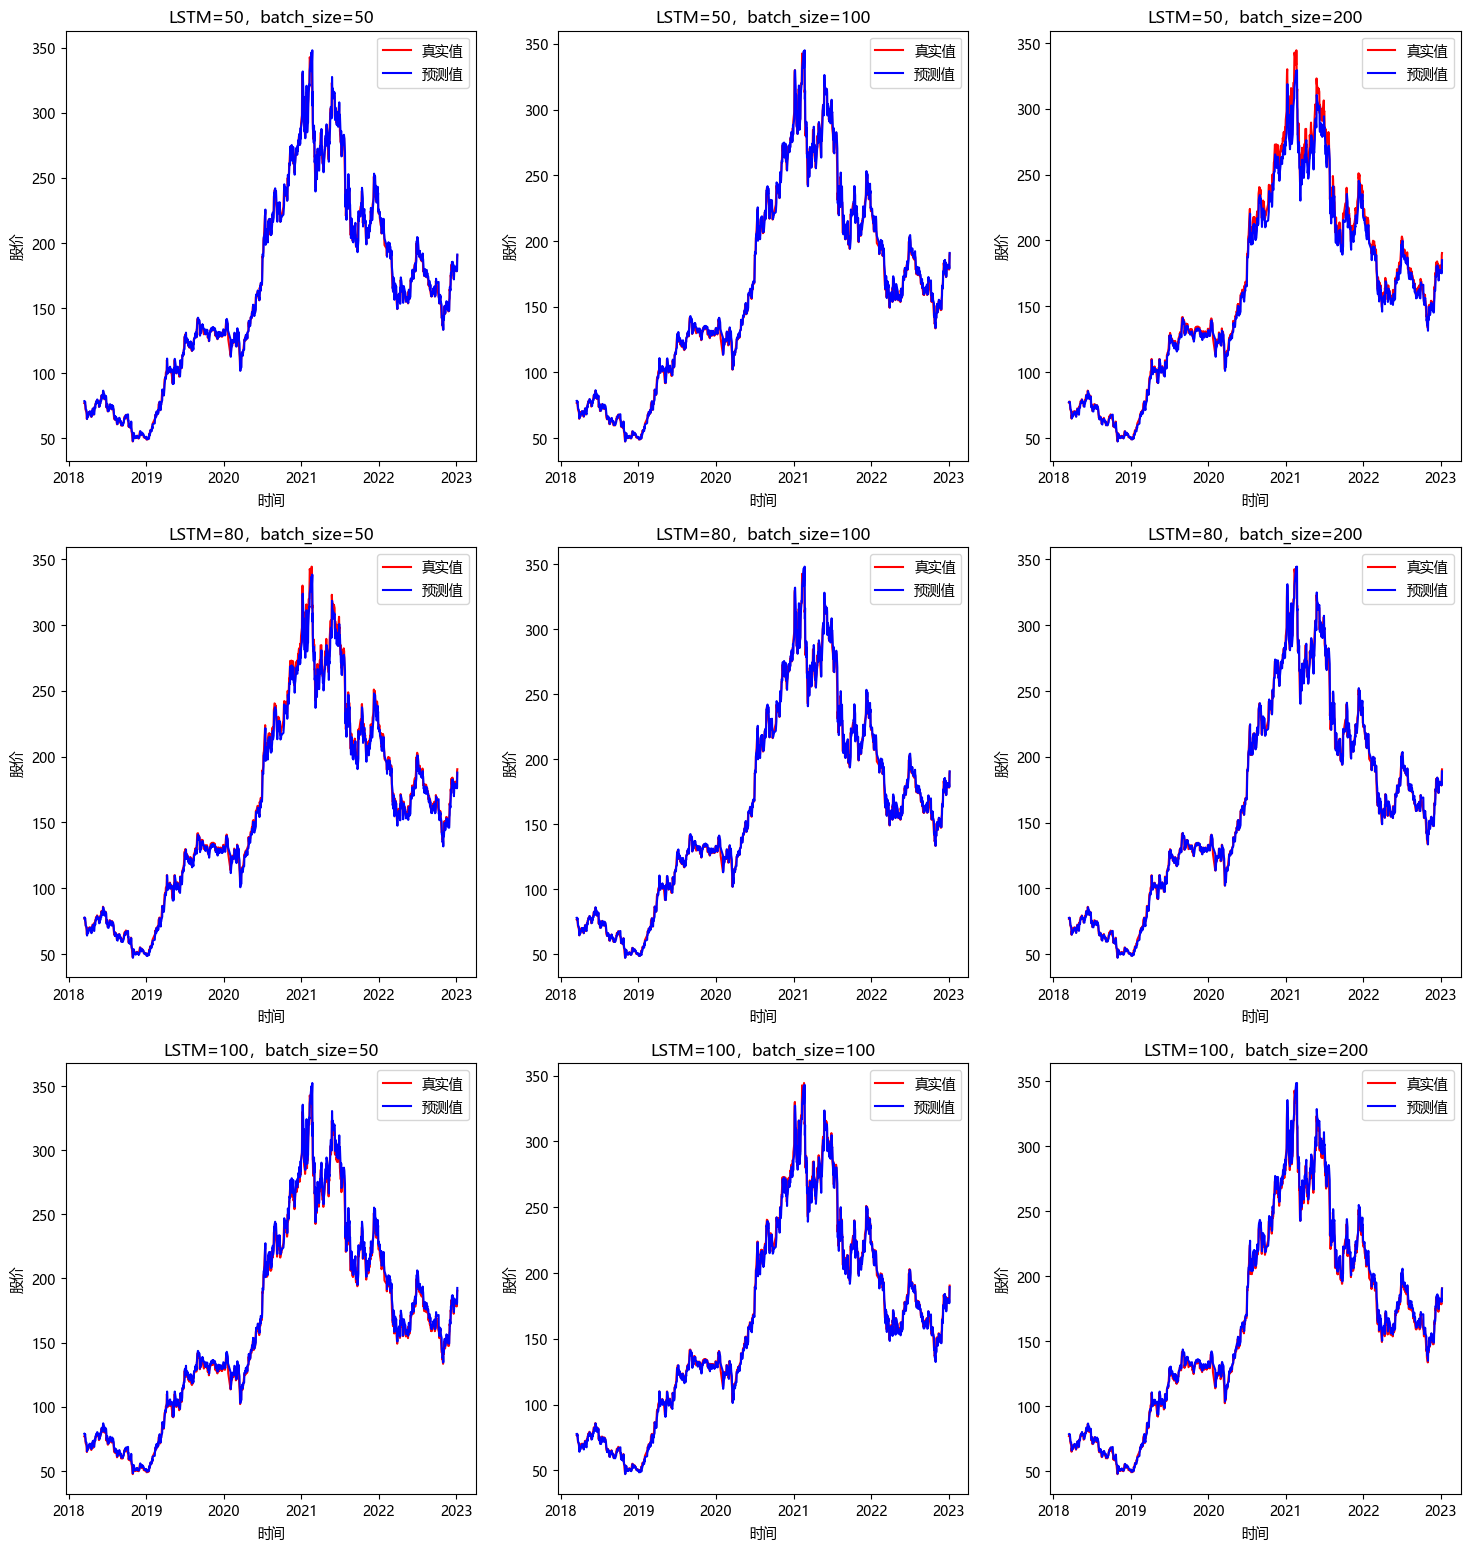

In [31]:
#不同参数取值下测试集预测值和真实值图
fig3,axes3 = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
test_data_LSTM_table = df_stock["收盘价"].iloc[int(len(df_stock)*0.8):]
for i in range(3):
    for j in range(3):
        test_predict_table = pd.DataFrame(df_LSTM_testpre_result["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])])
        axes3[i,j].plot(test_data_LSTM_table,"r")
        axes3[i,j].plot(test_predict_table,"b")
        axes3[i,j].legend(["真实值","预测值"],loc = 1)
        axes3[i,j].set_title("LSTM="+str(LSTM_layers_selection[i])+"，batch_size="+str(batch_size_selection[j]))
        axes3[i,j].set_xlabel('时间')
        axes3[i,j].set_ylabel('股价')

In [32]:
#观察图像可看出：训练集收敛时训练集的loss都在10^-6数量级，验证集loss都在10^-4数量级，比较接近
#故计算训练集预测结果的均方误差作为参数选取标准
df_MSE = pd.DataFrame()
df_LSTM_trainpre_result_copy = df_LSTM_trainpre_result.copy(deep = True)
df_LSTM_trainpre_result_copy["真实值"] = list(df_stock["收盘价"].iloc[100:int(len(df_stock)*0.8)])
for i in range(3):
    for j in range(3):
        df_LSTM_trainpre_result_copy["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])] = df_LSTM_trainpre_result_copy.apply(lambda x: x["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])] - x["真实值"], axis = 1)
        df_LSTM_trainpre_result_copy["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])] = df_LSTM_trainpre_result_copy["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])].apply(lambda x: x**2)
        df_MSE["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])] = [sum(df_LSTM_trainpre_result_copy["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])])/df_LSTM_trainpre_result_copy.shape[0]]
df_MSE

LSTM=50,batch_size=50  LSTM=50,batch_size=100  LSTM=50,batch_size=200  \
0               0.693756                0.666838                0.716767   

   LSTM=80,batch_size=50  LSTM=80,batch_size=100  LSTM=80,batch_size=200  \
0               0.680544                0.672268                0.749761   

   LSTM=100,batch_size=50  LSTM=100,batch_size=100  LSTM=100,batch_size=200  
0                0.811537                 0.714239                 0.705144

In [33]:
#选取训练集预测结果的均方误差最小值对应的参数为模型的参数
print("单变量LSTM模型训练集预测结果的均方误差最小值对应的模型参数为：",df_MSE.idxmin(axis = 1)[0])

单变量LSTM模型训练集预测结果的均方误差最小值对应的模型参数为： LSTM=50,batch_size=100


Text(0, 0.5, '股价')

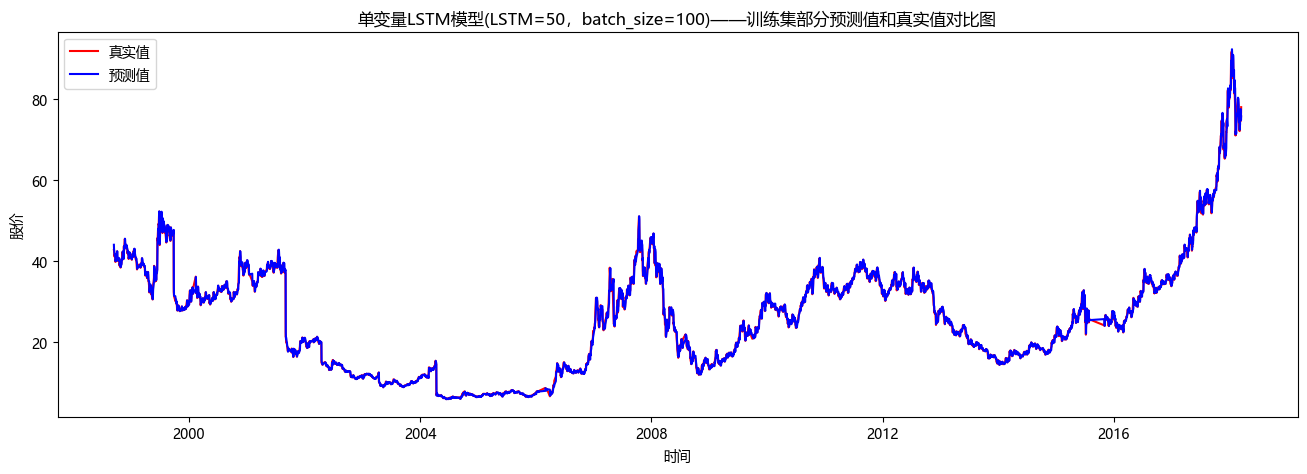

In [34]:
#对训练集进行预测，绘制对比图
plt.figure(figsize=(16,5))
train_predict_table = pd.DataFrame(df_LSTM_trainpre_result["LSTM=50,batch_size=100"])
plt.plot(train_data_LSTM_table,"r")
plt.plot(train_predict_table,"b")
plt.legend(["真实值","预测值"],loc = 2)
plt.title("单变量LSTM模型(LSTM=50，batch_size=100)——训练集部分预测值和真实值对比图")
plt.xlabel('时间')
plt.ylabel('股价')

Text(0, 0.5, '股价')

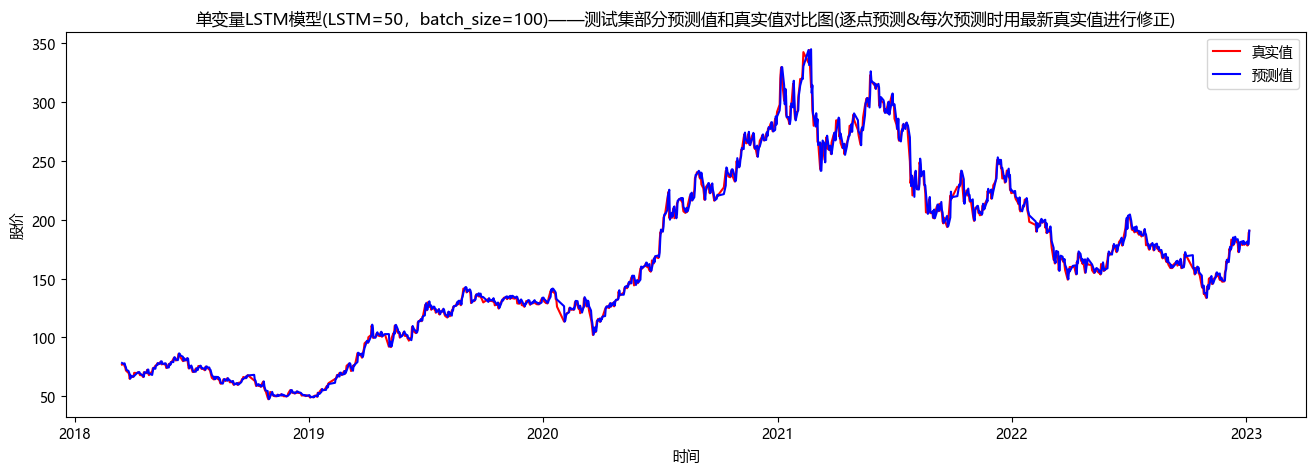

In [35]:
#对测试集集进行预测
#方法1：逐点预测(每次预测时用最新真实值进行修正)
#绘制对比图
plt.figure(figsize=(16,5))
test_predict_table = pd.DataFrame(df_LSTM_testpre_result["LSTM=50,batch_size=100"])
plt.plot(test_data_LSTM_table,"r")
plt.plot(test_predict_table,"b")
plt.legend(["真实值","预测值"],loc = 1)
plt.title("单变量LSTM模型(LSTM=50，batch_size=100)——测试集部分预测值和真实值对比图(逐点预测&每次预测时用最新真实值进行修正)")
plt.xlabel('时间')
plt.ylabel('股价')

In [36]:
#方法2：逐点预测(每次预测时不进行修正)
#模型训练
model = Sequential()
model.add(LSTM(50,return_sequences = False,input_shape = (100,1)))  #添加一层LSTM，LSTM层存储单元数为50
model.add(Dense(1))  #全连接层设置1个存储单元
model.compile(loss = 'mean_squared_error',optimizer='adam')  #损失函数选择MSE，优化算法选择Adam算法
print(model.summary())
#由调参时的epoches - log(loss)图可以看出，在参数值LSTM = 50，batch_size = 100下，epoches = 150时训练集training loss和validation loss均收敛且未过拟合，故设置epoches = 150进行模型训练
training_history = model.fit(train_data_part1_std,train_data_part2_std,validation_data=(test_data_part1_std,test_data_part2_std),epochs=150,batch_size=100,verbose=1)  

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
46/46 [==============================] - 7s 70ms/step - loss: 6.6157e-04 - val_loss: 0.0028
Epoch 2/150
46/46 [==============================] - 2s 51ms/step - loss: 3.2871e-05 - val_loss: 9.2768e-04
Epoch 3/150
46/46 [==============================] - 2s 53ms/step - loss: 2.8590e-05 - val_loss: 8.8786e-04
Epoch 4/150
46/46 [==============================] - 2s 51ms/step - loss: 2.7495e-05 - val_loss: 8.6063e-04
Epoch 5/150
46/46 [==============================] - 2s 52ms/step - loss: 2.652

Epoch 145/150
46/46 [==============================] - 3s 55ms/step - loss: 5.9190e-06 - val_loss: 1.9423e-04
Epoch 146/150
46/46 [==============================] - 3s 57ms/step - loss: 6.5089e-06 - val_loss: 2.3825e-04
Epoch 147/150
46/46 [==============================] - 3s 55ms/step - loss: 6.0991e-06 - val_loss: 1.9776e-04
Epoch 148/150
46/46 [==============================] - 3s 55ms/step - loss: 6.5068e-06 - val_loss: 2.0470e-04
Epoch 149/150
46/46 [==============================] - 3s 55ms/step - loss: 5.9725e-06 - val_loss: 1.9953e-04
Epoch 150/150
46/46 [==============================] - 3s 59ms/step - loss: 6.0181e-06 - val_loss: 2.3583e-04


In [37]:
forecast_total = []  #存储还原后的预测值
forecast_total_std = []  #存储归一化的预测值
test_data_yuce_std = dataset_total[int(len(dataset_total)*0.8)-100:int(len(dataset_total)*0.8)].flatten().tolist()  #存储所有预测时模型的输入值
for i in range(len(test_data_part2_std)):
    if i == 0:  
        test_data_yuce_std_1 = np.array(test_data_yuce_std)  #i=0时无需切片
    else:
        test_data_yuce_std_1 = np.array(test_data_yuce_std[i:100+i])
    forecast_input = np.reshape(test_data_yuce_std_1,(1,100,1))  #为输入小单元多加1个维度以满足LSTM输入维度
    forecast_input = forecast_input.astype('float64')  #转换为float类型
    forecast_output = model.predict(forecast_input) #得到当前输出
    forecast_total_std.append(forecast_output[0][0])  #将输出存储到存放归一化的预测值的列表中
    test_data_yuce_std.append(forecast_output[0][0])  #将输出存储到存放所有预测时模型的输入值的列表中
    test_data_yuce_std_1 = np.append(test_data_yuce_std_1,forecast_output[0][0])
    test_predict_inversed = scaler.inverse_transform(forecast_output)  #将预测结果还原得到真实预测值
    forecast_total.append(test_predict_inversed)  #存储还原后的还原后的预测值

<function matplotlib.pyplot.show(close=None, block=None)>

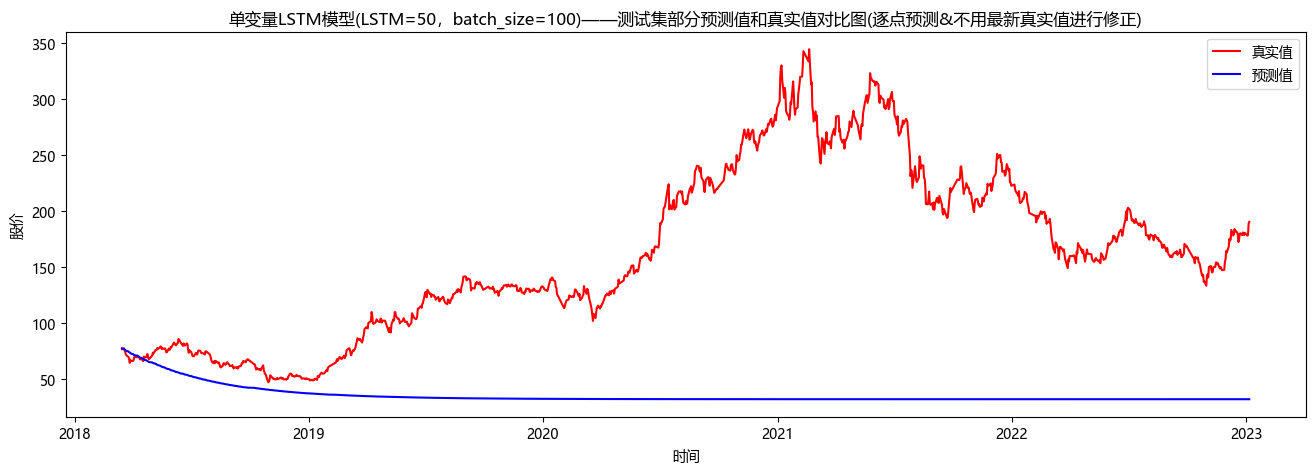

In [38]:
#绘制对比图
prediction5 = pd.DataFrame(np.array(forecast_total).reshape(-1,1))
prediction5 = prediction5.set_index(df_stock.iloc[int(len(df_stock)*0.8):].index)
plt.figure(figsize=(16,5))
plt.plot(test_data_LSTM_table,color='red')
plt.plot(prediction5, color='blue')
plt.title("单变量LSTM模型(LSTM=50，batch_size=100)——测试集部分预测值和真实值对比图(逐点预测&不用最新真实值进行修正)")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

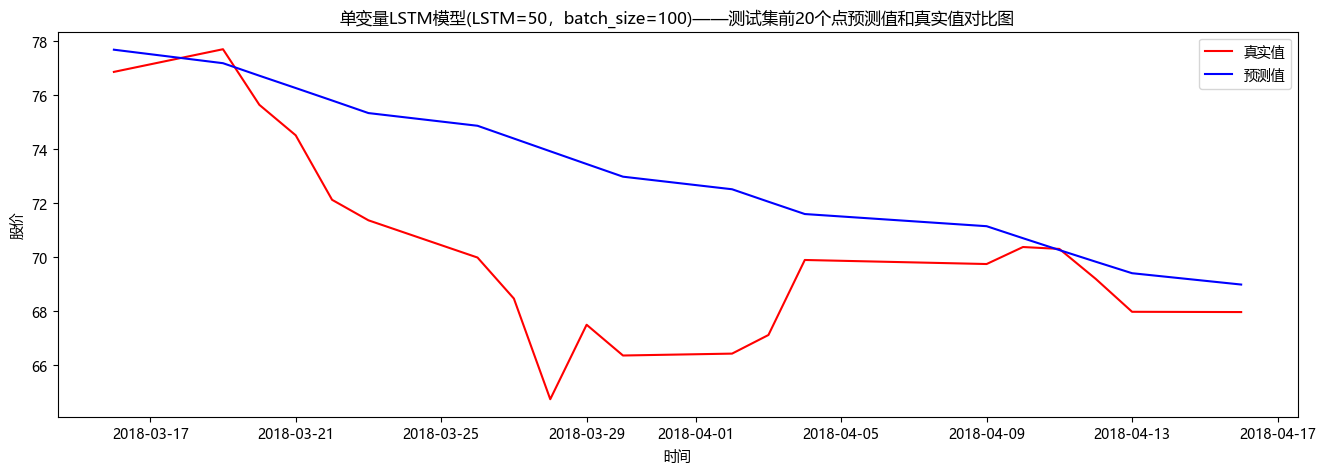

In [39]:
#对测试集前20个点进行预测，绘制对比图
plt.figure(figsize=(16,5))
plt.plot(test_data_LSTM_table.iloc[:20],color='red')
plt.plot(prediction5.iloc[:20], color='blue')
plt.title("单变量LSTM模型(LSTM=50，batch_size=100)——测试集前20个点预测值和真实值对比图")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

## 5.多变量LSTM

In [40]:
#尝试利用前一日收盘价和开盘价、最高价、最低价、成交额来预测未来20天收盘价

#重新创建汇总的表格
multivariable = ["开盘价","最高价","最低价","成交额","前一交易日收盘价","收盘价"]
df_LSTM_multi = df_stock[multivariable]

#原始数据归一化
scalerX = MinMaxScaler(feature_range = (0,1))
df_LSTM_multiX_std = scalerX.fit_transform(df_LSTM_multi[["开盘价","最高价","最低价","成交额","前一交易日收盘价"]])
scalerY = MinMaxScaler(feature_range = (0,1))
df_LSTM_multiY_std = scalerY.fit_transform(df_LSTM_multi["收盘价"].values.reshape(-1,1))

#(训练数据,标签)类型集合创建函数(100个训练数据对应20个标签)
def set_create_multi(data_setX,data_setY,time_step=100):
    data_part1 , data_part2 = [],[]
    for i in range(0,len(data_setX) - time_step - 20):
        c = data_setX[i:(i+time_step),:]
        data_part1.append(c)
        data_part2.append(data_setY[(i+time_step):(i+time_step+20)])
    return np.array(data_part1),np.array(data_part2)

#划分训练集和测试集(同样按8:2比例划分)
df_LSTM_multi_std_trainX = df_LSTM_multiX_std[0:int(len(df_LSTM_multi)*0.8),:]
df_LSTM_multi_std_testX = df_LSTM_multiX_std[int(len(df_LSTM_multi)*0.8)-100:,:]
df_LSTM_multi_std_trainY = df_LSTM_multiY_std[0:int(len(df_LSTM_multi)*0.8)]
df_LSTM_multi_std_testY = df_LSTM_multiY_std[int(len(df_LSTM_multi)*0.8)-100:]

#构造满足LSTM输入的训练/验证集合小单元
train_data_part1_std_multi,train_data_part2_std_multi = set_create_multi(df_LSTM_multi_std_trainX,df_LSTM_multi_std_trainY,)
test_data_part1_std_multi,test_data_part2_std_multi = set_create_multi(df_LSTM_multi_std_testX,df_LSTM_multi_std_testY,)

#标签多加1个维度以满足LSTM输入维度
train_data_part2_std_multi = np.reshape(train_data_part2_std_multi,(train_data_part2_std_multi.shape[0],train_data_part2_std_multi.shape[1],1))
test_data_part2_std_multi = np.reshape(test_data_part2_std_multi,(test_data_part2_std_multi.shape[0],test_data_part2_std_multi.shape[1],1))

#搜寻每个参数对应的收敛epochs值
LSTM_layers_selection_multi = [50,80,100]  #LSTM层存储单元数待选范围
batch_size_selection_multi = [50,100,200]  #batch_size待选范围

#创建dataframe列表存储训练结果
df_LSTM_result_multi = pd.DataFrame()
df_LSTM_result_multi["epochs"] = range(1,601)
filler = np.nan

#创建dataframe列表存储训练集预测结果(数据个数为20的倍数)
df_LSTM_trainpre_result_multi = pd.DataFrame()
df_LSTM_trainpre_result_multi["日期"] = df_stock.iloc[0:20*(int(len(df_stock)*0.8)//20)].index[100:]
df_LSTM_trainpre_result_multi = df_LSTM_trainpre_result_multi.set_index(df_stock.iloc[0:20*(int(len(df_stock)*0.8)//20)].index[100:])

#创建dataframe列表存储测试集预测结果(数据个数为20的倍数)
df_LSTM_testpre_result_multi = pd.DataFrame()
df_LSTM_testpre_result_multi["日期"] = df_stock.iloc[int(len(df_stock)*0.8):int(len(df_stock)*0.8)+20*((len(df_stock)-int(len(df_stock)*0.8))//20)].index
df_LSTM_testpre_result_multi = df_LSTM_testpre_result_multi.set_index(df_stock.iloc[int(len(df_stock)*0.8):int(len(df_stock)*0.8)+20*((len(df_stock)-int(len(df_stock)*0.8))//20)].index)

In [41]:
#寻找最优参数
for i in LSTM_layers_selection_multi:
    for j in batch_size_selection_multi:
        train_predict_multi_total = []
        test_predict_multi_total = []
        model = Sequential()
        model.add(LSTM(i,return_sequences = False,input_shape = (100,5)))  #添加一层LSTM，LSTM层存储单元数为i
        model.add(Dense(20))  #全连接层设置20个存储单元
        model.compile(loss = 'mean_squared_error',optimizer='adam')  #损失函数选择MSE，优化算法选择Adam算法
        print(model.summary())
        es = EarlyStopping(monitor = 'loss', min_delta = 1e-6,patience = 50)  #提前终止条件（当连续50个训练集loss之差小于1e-6），避免过拟合
        training_history_multi = model.fit(train_data_part1_std_multi,train_data_part2_std_multi,validation_data=(test_data_part1_std_multi,test_data_part2_std_multi),epochs=600,batch_size=j,verbose=1,callbacks=[es])  #设置较大epochs保证收敛
            
        df_LSTM_result_multi["LSTM="+str(i)+",batch_size="+str(j)+"  loss"] = training_history_multi.history["loss"] + [filler]*(len(df_LSTM_result_multi) - len(training_history_multi.history["loss"]))
        df_LSTM_result_multi["LSTM="+str(i)+",batch_size="+str(j)+"  val_loss"] = training_history_multi.history["val_loss"] + [filler]*(len(df_LSTM_result_multi) - len(training_history_multi.history["val_loss"]))
            
        for k in range((train_data_part1_std_multi.shape[0]//20)+1):
            input_now1 = np.reshape(train_data_part1_std_multi[20*k],(1,100,5))
            train_predict_std_multi = model.predict(input_now1)  #预测训练集数据
            train_predict_inversed = scalerY.inverse_transform(train_predict_std_multi).reshape(-1,1)  #将预测结果还原得到真实预测值
            for m in range(20):
                train_predict_multi_total.append(train_predict_inversed[m][0]) 
        df_LSTM_trainpre_result_multi["LSTM="+str(i)+",batch_size="+str(j)] = train_predict_multi_total  #存储训练集预测结果
        for l in range((test_data_part1_std.shape[0]//20)):
            input_now2 = np.reshape(test_data_part1_std_multi[20*l],(1,100,5))
            test_predict_std_multi = model.predict(input_now2)  #预测测试集数据
            test_predict_inversed = scalerY.inverse_transform(test_predict_std_multi).reshape(-1,1)  #将预测结果还原得到真实预测值
            for m in range(20):
                test_predict_multi_total.append(test_predict_inversed[m][0]) 
        df_LSTM_testpre_result_multi["LSTM="+str(i)+",batch_size="+str(j)] = test_predict_multi_total  #存储测试集预测结果

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50)                11200     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
Total params: 12,220
Trainable params: 12,220
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
92/92 [==============================] - 8s 48ms/step - loss: 5.7709e-04 - val_loss: 0.0064
Epoch 2/600
92/92 [==============================] - 4s 42ms/step - loss: 9.7091e-05 - val_loss: 0.0093
Epoch 3/600
92/92 [==============================] - 4s 41ms/step - loss: 9.0738e-05 - val_loss: 0.0092
Epoch 4/600
92/92 [==============================] - 4s 40ms/step - loss: 8.4901e-05 - val_loss: 0.0070
Epoch 5/600
92/92 [==============================] - 4s 41ms/step - loss: 8.5981e-05 - val

92/92 [==============================] - 4s 44ms/step - loss: 5.3773e-05 - val_loss: 0.0423
Epoch 151/600
92/92 [==============================] - 4s 44ms/step - loss: 5.5258e-05 - val_loss: 0.0344
Epoch 152/600
92/92 [==============================] - 4s 44ms/step - loss: 5.3390e-05 - val_loss: 0.0386
Epoch 153/600
92/92 [==============================] - 4s 45ms/step - loss: 5.4832e-05 - val_loss: 0.0384
Epoch 154/600
92/92 [==============================] - 4s 44ms/step - loss: 5.6423e-05 - val_loss: 0.0366
Epoch 155/600
92/92 [==============================] - 4s 44ms/step - loss: 5.3515e-05 - val_loss: 0.0367
Epoch 156/600
92/92 [==============================] - 4s 45ms/step - loss: 5.2769e-05 - val_loss: 0.0313
Epoch 157/600
92/92 [==============================] - 4s 44ms/step - loss: 5.3883e-05 - val_loss: 0.0308
Epoch 158/600
92/92 [==============================] - 4s 44ms/step - loss: 5.4580e-05 - val_loss: 0.0390
Epoch 159/600
92/92 [==============================] - 4s 45

92/92 [==============================] - 4s 44ms/step - loss: 4.1263e-05 - val_loss: 0.0470
Epoch 305/600
92/92 [==============================] - 4s 47ms/step - loss: 3.7383e-05 - val_loss: 0.0507
Epoch 306/600
92/92 [==============================] - 4s 45ms/step - loss: 3.7469e-05 - val_loss: 0.0493
Epoch 307/600
92/92 [==============================] - 4s 44ms/step - loss: 3.7211e-05 - val_loss: 0.0517
Epoch 308/600
92/92 [==============================] - 4s 44ms/step - loss: 3.5956e-05 - val_loss: 0.0483
Epoch 309/600
92/92 [==============================] - 4s 44ms/step - loss: 3.5830e-05 - val_loss: 0.0509
Epoch 310/600
92/92 [==============================] - 4s 44ms/step - loss: 3.6113e-05 - val_loss: 0.0477
Epoch 311/600
92/92 [==============================] - 4s 44ms/step - loss: 3.6849e-05 - val_loss: 0.0464
Epoch 312/600
92/92 [==============================] - 4s 44ms/step - loss: 4.3560e-05 - val_loss: 0.0493
Epoch 313/600
92/92 [==============================] - 4s 45

92/92 [==============================] - 4s 44ms/step - loss: 2.0155e-05 - val_loss: 0.0594
Epoch 459/600
92/92 [==============================] - 4s 46ms/step - loss: 2.1519e-05 - val_loss: 0.0557
Epoch 460/600
92/92 [==============================] - 4s 45ms/step - loss: 1.9821e-05 - val_loss: 0.0580
Epoch 461/600
92/92 [==============================] - 4s 45ms/step - loss: 1.9542e-05 - val_loss: 0.0543
Epoch 462/600
92/92 [==============================] - 4s 44ms/step - loss: 2.0128e-05 - val_loss: 0.0580
Epoch 463/600
92/92 [==============================] - 4s 44ms/step - loss: 1.9557e-05 - val_loss: 0.0586
Epoch 464/600
92/92 [==============================] - 4s 44ms/step - loss: 2.0921e-05 - val_loss: 0.0469
Epoch 465/600
92/92 [==============================] - 4s 45ms/step - loss: 2.1417e-05 - val_loss: 0.0580
Epoch 466/600
92/92 [==============================] - 4s 46ms/step - loss: 1.9332e-05 - val_loss: 0.0535
Epoch 467/600
92/92 [==============================] - 4s 46

46/46 [==============================] - 2s 48ms/step - loss: 8.5610e-05 - val_loss: 0.0121
Epoch 7/600
46/46 [==============================] - 2s 49ms/step - loss: 8.3103e-05 - val_loss: 0.0110
Epoch 8/600
46/46 [==============================] - 3s 55ms/step - loss: 8.1822e-05 - val_loss: 0.0110
Epoch 9/600
46/46 [==============================] - 3s 62ms/step - loss: 8.2539e-05 - val_loss: 0.0094
Epoch 10/600
46/46 [==============================] - 3s 59ms/step - loss: 8.1719e-05 - val_loss: 0.0078
Epoch 11/600
46/46 [==============================] - 3s 57ms/step - loss: 8.0419e-05 - val_loss: 0.0086
Epoch 12/600
46/46 [==============================] - 3s 58ms/step - loss: 7.9020e-05 - val_loss: 0.0086
Epoch 13/600
46/46 [==============================] - 3s 57ms/step - loss: 7.8246e-05 - val_loss: 0.0080
Epoch 14/600
46/46 [==============================] - 3s 57ms/step - loss: 7.6666e-05 - val_loss: 0.0065
Epoch 15/600
46/46 [==============================] - 3s 57ms/step - lo

46/46 [==============================] - 3s 57ms/step - loss: 5.7100e-05 - val_loss: 0.0700
Epoch 162/600
46/46 [==============================] - 3s 56ms/step - loss: 5.8034e-05 - val_loss: 0.0611
Epoch 163/600
46/46 [==============================] - 3s 57ms/step - loss: 5.6624e-05 - val_loss: 0.0671
Epoch 164/600
46/46 [==============================] - 3s 56ms/step - loss: 5.6930e-05 - val_loss: 0.0665
Epoch 165/600
46/46 [==============================] - 3s 56ms/step - loss: 5.6233e-05 - val_loss: 0.0542
Epoch 166/600
46/46 [==============================] - 3s 56ms/step - loss: 5.7276e-05 - val_loss: 0.0693
Epoch 167/600
46/46 [==============================] - 3s 57ms/step - loss: 5.7517e-05 - val_loss: 0.0671
Epoch 168/600
46/46 [==============================] - 3s 59ms/step - loss: 5.4926e-05 - val_loss: 0.0607
Epoch 169/600
46/46 [==============================] - 3s 59ms/step - loss: 5.5207e-05 - val_loss: 0.0628
Epoch 170/600
46/46 [==============================] - 3s 58

46/46 [==============================] - 3s 57ms/step - loss: 4.2423e-05 - val_loss: 0.0549
Epoch 316/600
46/46 [==============================] - 3s 58ms/step - loss: 4.2308e-05 - val_loss: 0.0587
Epoch 317/600
46/46 [==============================] - 3s 58ms/step - loss: 4.2667e-05 - val_loss: 0.0556
Epoch 318/600
46/46 [==============================] - 3s 57ms/step - loss: 4.3037e-05 - val_loss: 0.0599
Epoch 319/600
46/46 [==============================] - 3s 57ms/step - loss: 4.4245e-05 - val_loss: 0.0573
Epoch 320/600
46/46 [==============================] - 3s 57ms/step - loss: 4.2589e-05 - val_loss: 0.0602
Epoch 321/600
46/46 [==============================] - 3s 57ms/step - loss: 4.2496e-05 - val_loss: 0.0581
Epoch 322/600
46/46 [==============================] - 3s 56ms/step - loss: 4.3243e-05 - val_loss: 0.0560
Epoch 323/600
46/46 [==============================] - 3s 56ms/step - loss: 4.3395e-05 - val_loss: 0.0582
Epoch 324/600
46/46 [==============================] - 3s 57

46/46 [==============================] - 3s 57ms/step - loss: 3.1972e-05 - val_loss: 0.0858
Epoch 470/600
46/46 [==============================] - 3s 57ms/step - loss: 3.0340e-05 - val_loss: 0.0873
Epoch 471/600
46/46 [==============================] - 3s 57ms/step - loss: 3.0581e-05 - val_loss: 0.0876
Epoch 472/600
46/46 [==============================] - 3s 57ms/step - loss: 3.2149e-05 - val_loss: 0.0877
Epoch 473/600
46/46 [==============================] - 3s 60ms/step - loss: 3.1149e-05 - val_loss: 0.0862
Epoch 474/600
46/46 [==============================] - 3s 56ms/step - loss: 2.9494e-05 - val_loss: 0.0874
Epoch 475/600
46/46 [==============================] - 3s 57ms/step - loss: 2.9408e-05 - val_loss: 0.0859
Epoch 476/600
46/46 [==============================] - 3s 57ms/step - loss: 3.2019e-05 - val_loss: 0.0835
Epoch 477/600
46/46 [==============================] - 3s 57ms/step - loss: 3.1420e-05 - val_loss: 0.0850
Epoch 478/600
46/46 [==============================] - 3s 56

Epoch 18/600
23/23 [==============================] - 2s 76ms/step - loss: 8.0398e-05 - val_loss: 0.0089
Epoch 19/600
23/23 [==============================] - 2s 76ms/step - loss: 8.0350e-05 - val_loss: 0.0080
Epoch 20/600
23/23 [==============================] - 2s 75ms/step - loss: 7.9862e-05 - val_loss: 0.0083
Epoch 21/600
23/23 [==============================] - 2s 76ms/step - loss: 7.9937e-05 - val_loss: 0.0082
Epoch 22/600
23/23 [==============================] - 2s 75ms/step - loss: 7.9013e-05 - val_loss: 0.0075
Epoch 23/600
23/23 [==============================] - 2s 75ms/step - loss: 7.8524e-05 - val_loss: 0.0071
Epoch 24/600
23/23 [==============================] - 2s 81ms/step - loss: 7.8078e-05 - val_loss: 0.0068
Epoch 25/600
23/23 [==============================] - 2s 76ms/step - loss: 7.9660e-05 - val_loss: 0.0061
Epoch 26/600
23/23 [==============================] - 2s 77ms/step - loss: 7.7267e-05 - val_loss: 0.0057
Epoch 27/600
23/23 [==============================] - 2

Epoch 96/600
23/23 [==============================] - 2s 76ms/step - loss: 6.7658e-05 - val_loss: 0.0056
Epoch 97/600
23/23 [==============================] - 2s 76ms/step - loss: 6.7515e-05 - val_loss: 0.0052
Epoch 98/600
23/23 [==============================] - 2s 76ms/step - loss: 6.6762e-05 - val_loss: 0.0049
Epoch 99/600
23/23 [==============================] - 2s 76ms/step - loss: 6.6794e-05 - val_loss: 0.0057
Epoch 100/600
23/23 [==============================] - 2s 76ms/step - loss: 6.6920e-05 - val_loss: 0.0058
Epoch 101/600
23/23 [==============================] - 2s 78ms/step - loss: 6.6934e-05 - val_loss: 0.0058
Epoch 102/600
23/23 [==============================] - 2s 78ms/step - loss: 6.6644e-05 - val_loss: 0.0086
Epoch 103/600
23/23 [==============================] - 2s 76ms/step - loss: 6.7404e-05 - val_loss: 0.0087
Epoch 104/600
23/23 [==============================] - 2s 76ms/step - loss: 6.7120e-05 - val_loss: 0.0058
Epoch 105/600
23/23 [=============================

23/23 [==============================] - 2s 76ms/step - loss: 5.6596e-05 - val_loss: 0.0728
Epoch 251/600
23/23 [==============================] - 2s 76ms/step - loss: 5.7681e-05 - val_loss: 0.0780
Epoch 252/600
23/23 [==============================] - 2s 76ms/step - loss: 5.6807e-05 - val_loss: 0.0825
Epoch 253/600
23/23 [==============================] - 2s 76ms/step - loss: 5.6882e-05 - val_loss: 0.0830
Epoch 254/600
23/23 [==============================] - 2s 76ms/step - loss: 5.7486e-05 - val_loss: 0.0850
Epoch 255/600
23/23 [==============================] - 2s 76ms/step - loss: 5.7279e-05 - val_loss: 0.0781
Epoch 256/600
23/23 [==============================] - 2s 76ms/step - loss: 5.6509e-05 - val_loss: 0.0737
Epoch 257/600
23/23 [==============================] - 2s 77ms/step - loss: 5.6262e-05 - val_loss: 0.0720
Epoch 258/600
23/23 [==============================] - 2s 76ms/step - loss: 5.5902e-05 - val_loss: 0.0744
Epoch 259/600
23/23 [==============================] - 2s 77

23/23 [==============================] - 2s 76ms/step - loss: 4.1516e-05 - val_loss: 0.0978
Epoch 405/600
23/23 [==============================] - 2s 76ms/step - loss: 4.0779e-05 - val_loss: 0.1086
Epoch 406/600
23/23 [==============================] - 2s 77ms/step - loss: 4.1313e-05 - val_loss: 0.1013
Epoch 407/600
23/23 [==============================] - 2s 77ms/step - loss: 4.1582e-05 - val_loss: 0.1003
Epoch 408/600
23/23 [==============================] - 2s 76ms/step - loss: 4.1573e-05 - val_loss: 0.1065
Epoch 409/600
23/23 [==============================] - 2s 77ms/step - loss: 4.1300e-05 - val_loss: 0.1058
Epoch 410/600
23/23 [==============================] - 2s 82ms/step - loss: 3.9917e-05 - val_loss: 0.1040
Epoch 411/600
23/23 [==============================] - 2s 76ms/step - loss: 4.0847e-05 - val_loss: 0.1032
Epoch 412/600
23/23 [==============================] - 2s 77ms/step - loss: 3.9835e-05 - val_loss: 0.1014
Epoch 413/600
23/23 [==============================] - 2s 78

23/23 [==============================] - 2s 76ms/step - loss: 3.3025e-05 - val_loss: 0.0947
Epoch 559/600
23/23 [==============================] - 2s 76ms/step - loss: 3.3461e-05 - val_loss: 0.0938
Epoch 560/600
23/23 [==============================] - 2s 76ms/step - loss: 3.2661e-05 - val_loss: 0.0981
Epoch 561/600
23/23 [==============================] - 2s 77ms/step - loss: 3.3374e-05 - val_loss: 0.0951
Epoch 562/600
23/23 [==============================] - 2s 76ms/step - loss: 3.3018e-05 - val_loss: 0.0985
Epoch 563/600
23/23 [==============================] - 2s 77ms/step - loss: 3.2924e-05 - val_loss: 0.0987
Epoch 564/600
23/23 [==============================] - 2s 76ms/step - loss: 3.3745e-05 - val_loss: 0.0940
Epoch 565/600
23/23 [==============================] - 2s 76ms/step - loss: 3.3974e-05 - val_loss: 0.0972
Epoch 566/600
23/23 [==============================] - 2s 77ms/step - loss: 3.4441e-05 - val_loss: 0.0969
Epoch 567/600
23/23 [==============================] - 2s 78

Epoch 30/600
92/92 [==============================] - 5s 51ms/step - loss: 6.8362e-05 - val_loss: 0.0023
Epoch 31/600
92/92 [==============================] - 5s 51ms/step - loss: 6.9147e-05 - val_loss: 0.0026
Epoch 32/600
92/92 [==============================] - 5s 51ms/step - loss: 6.9105e-05 - val_loss: 0.0024
Epoch 33/600
92/92 [==============================] - 5s 51ms/step - loss: 6.7177e-05 - val_loss: 0.0022
Epoch 34/600
92/92 [==============================] - 5s 51ms/step - loss: 6.7541e-05 - val_loss: 0.0025
Epoch 35/600
92/92 [==============================] - 5s 51ms/step - loss: 6.8590e-05 - val_loss: 0.0024
Epoch 36/600
92/92 [==============================] - 5s 51ms/step - loss: 6.7143e-05 - val_loss: 0.0022
Epoch 37/600
92/92 [==============================] - 5s 52ms/step - loss: 6.6710e-05 - val_loss: 0.0026
Epoch 38/600
92/92 [==============================] - 5s 51ms/step - loss: 6.6669e-05 - val_loss: 0.0036
Epoch 39/600
92/92 [==============================] - 5

Epoch 108/600
92/92 [==============================] - 5s 51ms/step - loss: 6.2580e-05 - val_loss: 0.0255
Epoch 109/600
92/92 [==============================] - 5s 51ms/step - loss: 6.3969e-05 - val_loss: 0.0340
Epoch 110/600
92/92 [==============================] - 5s 53ms/step - loss: 6.2232e-05 - val_loss: 0.0251
Epoch 111/600
92/92 [==============================] - 5s 51ms/step - loss: 6.1601e-05 - val_loss: 0.0239
Epoch 112/600
92/92 [==============================] - 5s 51ms/step - loss: 6.0327e-05 - val_loss: 0.0183
Epoch 113/600
92/92 [==============================] - 5s 52ms/step - loss: 6.0709e-05 - val_loss: 0.0314
Epoch 114/600
92/92 [==============================] - 5s 52ms/step - loss: 5.9727e-05 - val_loss: 0.0288
Epoch 115/600
92/92 [==============================] - 5s 52ms/step - loss: 6.0089e-05 - val_loss: 0.0285
Epoch 116/600
92/92 [==============================] - 5s 52ms/step - loss: 6.2602e-05 - val_loss: 0.0410
Epoch 117/600
92/92 [=========================

92/92 [==============================] - 5s 54ms/step - loss: 4.2507e-05 - val_loss: 0.0445
Epoch 263/600
92/92 [==============================] - 5s 52ms/step - loss: 4.0396e-05 - val_loss: 0.0500
Epoch 264/600
92/92 [==============================] - 5s 55ms/step - loss: 4.9857e-05 - val_loss: 0.0521
Epoch 265/600
92/92 [==============================] - 5s 53ms/step - loss: 4.2541e-05 - val_loss: 0.0478
Epoch 266/600
92/92 [==============================] - 5s 52ms/step - loss: 4.1217e-05 - val_loss: 0.0486
Epoch 267/600
92/92 [==============================] - 5s 51ms/step - loss: 4.1907e-05 - val_loss: 0.0453
Epoch 268/600
92/92 [==============================] - 5s 51ms/step - loss: 4.0804e-05 - val_loss: 0.0439
Epoch 269/600
92/92 [==============================] - 5s 51ms/step - loss: 4.0995e-05 - val_loss: 0.0457
Epoch 270/600
92/92 [==============================] - 5s 51ms/step - loss: 3.9910e-05 - val_loss: 0.0445
Epoch 271/600
92/92 [==============================] - 5s 53

46/46 [==============================] - 3s 68ms/step - loss: 8.5018e-05 - val_loss: 0.0069
Epoch 7/600
46/46 [==============================] - 3s 71ms/step - loss: 8.7005e-05 - val_loss: 0.0074
Epoch 8/600
46/46 [==============================] - 3s 75ms/step - loss: 8.1421e-05 - val_loss: 0.0067
Epoch 9/600
46/46 [==============================] - 3s 71ms/step - loss: 8.0939e-05 - val_loss: 0.0059
Epoch 10/600
46/46 [==============================] - 3s 74ms/step - loss: 8.1401e-05 - val_loss: 0.0063
Epoch 11/600
46/46 [==============================] - 3s 69ms/step - loss: 8.0616e-05 - val_loss: 0.0050
Epoch 12/600
46/46 [==============================] - 3s 69ms/step - loss: 7.8143e-05 - val_loss: 0.0055
Epoch 13/600
46/46 [==============================] - 3s 69ms/step - loss: 7.8033e-05 - val_loss: 0.0040
Epoch 14/600
46/46 [==============================] - 3s 69ms/step - loss: 7.7035e-05 - val_loss: 0.0043
Epoch 15/600
46/46 [==============================] - 3s 69ms/step - lo

46/46 [==============================] - 3s 71ms/step - loss: 5.4439e-05 - val_loss: 0.0492
Epoch 162/600
46/46 [==============================] - 3s 69ms/step - loss: 5.3771e-05 - val_loss: 0.0451
Epoch 163/600
46/46 [==============================] - 3s 69ms/step - loss: 5.2519e-05 - val_loss: 0.0469
Epoch 164/600
46/46 [==============================] - 3s 69ms/step - loss: 5.3840e-05 - val_loss: 0.0526
Epoch 165/600
46/46 [==============================] - 3s 69ms/step - loss: 5.4247e-05 - val_loss: 0.0562
Epoch 166/600
46/46 [==============================] - 3s 69ms/step - loss: 5.2130e-05 - val_loss: 0.0554
Epoch 167/600
46/46 [==============================] - 3s 69ms/step - loss: 5.1849e-05 - val_loss: 0.0451
Epoch 168/600
46/46 [==============================] - 3s 69ms/step - loss: 5.2160e-05 - val_loss: 0.0480
Epoch 169/600
46/46 [==============================] - 3s 70ms/step - loss: 5.2897e-05 - val_loss: 0.0427
Epoch 170/600
46/46 [==============================] - 3s 69

46/46 [==============================] - 3s 69ms/step - loss: 3.5368e-05 - val_loss: 0.0597
Epoch 316/600
46/46 [==============================] - 3s 69ms/step - loss: 3.2472e-05 - val_loss: 0.0637
Epoch 317/600
46/46 [==============================] - 3s 69ms/step - loss: 3.3609e-05 - val_loss: 0.0619
Epoch 318/600
46/46 [==============================] - 3s 71ms/step - loss: 3.6358e-05 - val_loss: 0.0663
Epoch 319/600
46/46 [==============================] - 3s 73ms/step - loss: 3.3918e-05 - val_loss: 0.0634
Epoch 320/600
46/46 [==============================] - 3s 70ms/step - loss: 3.3752e-05 - val_loss: 0.0589e
Epoch 321/600
46/46 [==============================] - 3s 69ms/step - loss: 3.2073e-05 - val_loss: 0.0641
Epoch 322/600
46/46 [==============================] - 3s 69ms/step - loss: 3.2614e-05 - val_loss: 0.0642
Epoch 323/600
46/46 [==============================] - 3s 69ms/step - loss: 3.3495e-05 - val_loss: 0.0575
Epoch 324/600
46/46 [==============================] - 3s 7

46/46 [==============================] - 3s 69ms/step - loss: 2.0932e-05 - val_loss: 0.0802
Epoch 470/600
46/46 [==============================] - 3s 70ms/step - loss: 1.8724e-05 - val_loss: 0.0817
Epoch 471/600
46/46 [==============================] - 3s 69ms/step - loss: 1.8178e-05 - val_loss: 0.0806
Epoch 472/600
46/46 [==============================] - 3s 70ms/step - loss: 2.0821e-05 - val_loss: 0.0813
Epoch 473/600
46/46 [==============================] - 3s 69ms/step - loss: 1.8998e-05 - val_loss: 0.0807
Epoch 474/600
46/46 [==============================] - 3s 70ms/step - loss: 1.9099e-05 - val_loss: 0.0807
Epoch 475/600
46/46 [==============================] - 3s 72ms/step - loss: 1.9196e-05 - val_loss: 0.0831
Epoch 476/600
46/46 [==============================] - 3s 69ms/step - loss: 1.8278e-05 - val_loss: 0.0811
Epoch 477/600
46/46 [==============================] - 3s 69ms/step - loss: 1.9320e-05 - val_loss: 0.0873
Epoch 478/600
46/46 [==============================] - 3s 70

Epoch 546/600
46/46 [==============================] - 3s 71ms/step - loss: 1.5631e-05 - val_loss: 0.0900
Epoch 547/600
46/46 [==============================] - 3s 70ms/step - loss: 1.6367e-05 - val_loss: 0.0863
Epoch 548/600
46/46 [==============================] - 3s 69ms/step - loss: 1.7950e-05 - val_loss: 0.0907
Epoch 549/600
46/46 [==============================] - 3s 73ms/step - loss: 1.5711e-05 - val_loss: 0.0889
Epoch 550/600
46/46 [==============================] - 3s 69ms/step - loss: 1.6103e-05 - val_loss: 0.0885
Epoch 551/600
46/46 [==============================] - 3s 70ms/step - loss: 1.5404e-05 - val_loss: 0.0861
Epoch 552/600
46/46 [==============================] - 3s 70ms/step - loss: 1.5476e-05 - val_loss: 0.0881
Epoch 553/600
46/46 [==============================] - 3s 69ms/step - loss: 1.5466e-05 - val_loss: 0.0890
Epoch 554/600
46/46 [==============================] - 3s 70ms/step - loss: 1.5486e-05 - val_loss: 0.0925
Epoch 555/600
46/46 [=========================

23/23 [==============================] - 2s 103ms/step - loss: 6.7019e-05 - val_loss: 0.0037
Epoch 95/600
23/23 [==============================] - 2s 103ms/step - loss: 6.9614e-05 - val_loss: 0.0044
Epoch 96/600
23/23 [==============================] - 2s 106ms/step - loss: 6.7555e-05 - val_loss: 0.0031
Epoch 97/600
23/23 [==============================] - 2s 108ms/step - loss: 6.7358e-05 - val_loss: 0.0036
Epoch 98/600
23/23 [==============================] - 2s 103ms/step - loss: 6.7358e-05 - val_loss: 0.0039
Epoch 99/600
23/23 [==============================] - 2s 105ms/step - loss: 6.6939e-05 - val_loss: 0.0043
Epoch 100/600
23/23 [==============================] - 2s 103ms/step - loss: 6.7638e-05 - val_loss: 0.0047
Epoch 101/600
23/23 [==============================] - 2s 103ms/step - loss: 6.9561e-05 - val_loss: 0.0039
Epoch 102/600
23/23 [==============================] - 2s 103ms/step - loss: 6.7804e-05 - val_loss: 0.0051
Epoch 103/600
23/23 [==============================] - 2

23/23 [==============================] - 2s 103ms/step - loss: 5.0486e-05 - val_loss: 0.0553
Epoch 247/600
23/23 [==============================] - 2s 105ms/step - loss: 5.1022e-05 - val_loss: 0.0559
Epoch 248/600
23/23 [==============================] - 2s 107ms/step - loss: 4.8842e-05 - val_loss: 0.0508
Epoch 249/600
23/23 [==============================] - 2s 104ms/step - loss: 4.9937e-05 - val_loss: 0.0505
Epoch 250/600
23/23 [==============================] - 2s 106ms/step - loss: 5.0238e-05 - val_loss: 0.0491
Epoch 251/600
23/23 [==============================] - 2s 107ms/step - loss: 5.1561e-05 - val_loss: 0.0520-
Epoch 252/600
23/23 [==============================] - 2s 103ms/step - loss: 4.9405e-05 - val_loss: 0.0552
Epoch 253/600
23/23 [==============================] - 2s 102ms/step - loss: 5.1263e-05 - val_loss: 0.0508
Epoch 254/600
23/23 [==============================] - 2s 104ms/step - loss: 4.9662e-05 - val_loss: 0.0550
Epoch 255/600
23/23 [=============================

23/23 [==============================] - 2s 105ms/step - loss: 3.6710e-05 - val_loss: 0.0748
Epoch 399/600
23/23 [==============================] - 2s 107ms/step - loss: 4.2010e-05 - val_loss: 0.0709
Epoch 400/600
23/23 [==============================] - 2s 105ms/step - loss: 3.9589e-05 - val_loss: 0.0717
Epoch 401/600
23/23 [==============================] - 2s 103ms/step - loss: 3.7607e-05 - val_loss: 0.0728
Epoch 402/600
23/23 [==============================] - 2s 105ms/step - loss: 3.6243e-05 - val_loss: 0.0750
Epoch 403/600
23/23 [==============================] - 2s 104ms/step - loss: 3.5752e-05 - val_loss: 0.0746
Epoch 404/600
23/23 [==============================] - 2s 103ms/step - loss: 3.5073e-05 - val_loss: 0.0753
Epoch 405/600
23/23 [==============================] - 2s 103ms/step - loss: 3.5407e-05 - val_loss: 0.0756
Epoch 406/600
23/23 [==============================] - 2s 103ms/step - loss: 4.0427e-05 - val_loss: 0.0734
Epoch 407/600
23/23 [==============================

23/23 [==============================] - 2s 105ms/step - loss: 2.6381e-05 - val_loss: 0.0802
Epoch 551/600
23/23 [==============================] - 2s 109ms/step - loss: 2.5467e-05 - val_loss: 0.0806
Epoch 552/600
23/23 [==============================] - 2s 103ms/step - loss: 2.4787e-05 - val_loss: 0.0827
Epoch 553/600
23/23 [==============================] - 2s 104ms/step - loss: 2.5611e-05 - val_loss: 0.0834
Epoch 554/600
23/23 [==============================] - 2s 105ms/step - loss: 2.7055e-05 - val_loss: 0.0843
Epoch 555/600
23/23 [==============================] - 2s 104ms/step - loss: 2.6877e-05 - val_loss: 0.0824
Epoch 556/600
23/23 [==============================] - 2s 103ms/step - loss: 2.5686e-05 - val_loss: 0.0842
Epoch 557/600
23/23 [==============================] - 2s 106ms/step - loss: 2.5284e-05 - val_loss: 0.0849
Epoch 558/600
23/23 [==============================] - 2s 107ms/step - loss: 2.4870e-05 - val_loss: 0.0863
Epoch 559/600
23/23 [==============================

92/92 [==============================] - 5s 59ms/step - loss: 5.8694e-05 - val_loss: 0.0139
Epoch 100/600
92/92 [==============================] - 5s 58ms/step - loss: 5.8581e-05 - val_loss: 0.0142
Epoch 101/600
92/92 [==============================] - 5s 59ms/step - loss: 5.9185e-05 - val_loss: 0.0140
Epoch 102/600
92/92 [==============================] - 5s 59ms/step - loss: 5.7997e-05 - val_loss: 0.0104
Epoch 103/600
92/92 [==============================] - 5s 59ms/step - loss: 5.9030e-05 - val_loss: 0.0088
Epoch 104/600
92/92 [==============================] - 5s 59ms/step - loss: 5.9681e-05 - val_loss: 0.0171
Epoch 105/600
92/92 [==============================] - 6s 65ms/step - loss: 5.8118e-05 - val_loss: 0.0136
Epoch 106/600
92/92 [==============================] - 6s 67ms/step - loss: 5.8210e-05 - val_loss: 0.0202
Epoch 107/600
92/92 [==============================] - 6s 66ms/step - loss: 5.8350e-05 - val_loss: 0.0180
Epoch 108/600
92/92 [==============================] - 6s 63

92/92 [==============================] - 5s 60ms/step - loss: 5.0808e-05 - val_loss: 0.0762
Epoch 254/600
92/92 [==============================] - 5s 59ms/step - loss: 4.3654e-05 - val_loss: 0.0761
Epoch 255/600
92/92 [==============================] - 5s 60ms/step - loss: 4.0908e-05 - val_loss: 0.0758
Epoch 256/600
92/92 [==============================] - 6s 62ms/step - loss: 4.1122e-05 - val_loss: 0.0758
Epoch 257/600
92/92 [==============================] - 5s 59ms/step - loss: 3.8789e-05 - val_loss: 0.0770
Epoch 258/600
92/92 [==============================] - 6s 60ms/step - loss: 3.8498e-05 - val_loss: 0.0808
Epoch 259/600
92/92 [==============================] - 5s 59ms/step - loss: 3.9032e-05 - val_loss: 0.0777
Epoch 260/600
92/92 [==============================] - 5s 59ms/step - loss: 3.8583e-05 - val_loss: 0.0844
Epoch 261/600
92/92 [==============================] - 5s 59ms/step - loss: 4.3000e-05 - val_loss: 0.0871
Epoch 262/600
92/92 [==============================] - 5s 59

92/92 [==============================] - 6s 60ms/step - loss: 1.8700e-05 - val_loss: 0.1076
Epoch 408/600
92/92 [==============================] - 5s 59ms/step - loss: 1.7849e-05 - val_loss: 0.1062
Epoch 409/600
92/92 [==============================] - 6s 60ms/step - loss: 1.8435e-05 - val_loss: 0.1079
Epoch 410/600
92/92 [==============================] - 5s 59ms/step - loss: 1.9560e-05 - val_loss: 0.1053
Epoch 411/600
92/92 [==============================] - 6s 60ms/step - loss: 1.8683e-05 - val_loss: 0.1059
Epoch 412/600
92/92 [==============================] - 5s 59ms/step - loss: 1.8997e-05 - val_loss: 0.1072
Epoch 413/600
92/92 [==============================] - 6s 60ms/step - loss: 1.8309e-05 - val_loss: 0.1050
Epoch 414/600
92/92 [==============================] - 5s 59ms/step - loss: 1.7541e-05 - val_loss: 0.1063
Epoch 415/600
92/92 [==============================] - 5s 59ms/step - loss: 1.7949e-05 - val_loss: 0.1048
Epoch 416/600
92/92 [==============================] - 5s 59

92/92 [==============================] - 5s 60ms/step - loss: 9.5310e-06 - val_loss: 0.1377
Epoch 562/600
92/92 [==============================] - 6s 63ms/step - loss: 9.6510e-06 - val_loss: 0.1385
Epoch 563/600
92/92 [==============================] - 5s 59ms/step - loss: 9.4982e-06 - val_loss: 0.1424
Epoch 564/600
92/92 [==============================] - 5s 59ms/step - loss: 1.0075e-05 - val_loss: 0.1365
Epoch 565/600
92/92 [==============================] - 5s 59ms/step - loss: 9.6168e-06 - val_loss: 0.1365
Epoch 566/600
92/92 [==============================] - 5s 59ms/step - loss: 9.2529e-06 - val_loss: 0.1372
Epoch 567/600
92/92 [==============================] - 6s 60ms/step - loss: 1.0059e-05 - val_loss: 0.1366
Epoch 568/600
92/92 [==============================] - 6s 60ms/step - loss: 1.0367e-05 - val_loss: 0.1328
Epoch 569/600
92/92 [==============================] - 5s 59ms/step - loss: 9.7520e-06 - val_loss: 0.1384
Epoch 570/600
92/92 [==============================] - 5s 59

Epoch 33/600
46/46 [==============================] - 4s 86ms/step - loss: 6.9808e-05 - val_loss: 0.0024
Epoch 34/600
46/46 [==============================] - 4s 83ms/step - loss: 7.0135e-05 - val_loss: 0.0025
Epoch 35/600
46/46 [==============================] - 4s 80ms/step - loss: 6.9550e-05 - val_loss: 0.0025
Epoch 36/600
46/46 [==============================] - 4s 81ms/step - loss: 7.0077e-05 - val_loss: 0.0026
Epoch 37/600
46/46 [==============================] - 4s 81ms/step - loss: 6.9349e-05 - val_loss: 0.0027
Epoch 38/600
46/46 [==============================] - 4s 81ms/step - loss: 6.9070e-05 - val_loss: 0.0025
Epoch 39/600
46/46 [==============================] - 4s 80ms/step - loss: 7.0712e-05 - val_loss: 0.0026
Epoch 40/600
46/46 [==============================] - 4s 81ms/step - loss: 6.8624e-05 - val_loss: 0.0028
Epoch 41/600
46/46 [==============================] - 4s 82ms/step - loss: 6.8559e-05 - val_loss: 0.0024
Epoch 42/600
46/46 [==============================] - 4

Epoch 111/600
46/46 [==============================] - 4s 80ms/step - loss: 6.3092e-05 - val_loss: 0.0094
Epoch 112/600
46/46 [==============================] - 4s 83ms/step - loss: 6.3382e-05 - val_loss: 0.0079
Epoch 113/600
46/46 [==============================] - 4s 85ms/step - loss: 6.2739e-05 - val_loss: 0.0121
Epoch 114/600
46/46 [==============================] - 4s 82ms/step - loss: 6.1549e-05 - val_loss: 0.0175
Epoch 115/600
46/46 [==============================] - 4s 81ms/step - loss: 6.2838e-05 - val_loss: 0.0111
Epoch 116/600
46/46 [==============================] - 4s 81ms/step - loss: 6.0316e-05 - val_loss: 0.0109
Epoch 117/600
46/46 [==============================] - 4s 81ms/step - loss: 6.2036e-05 - val_loss: 0.0178
Epoch 118/600
46/46 [==============================] - 4s 80ms/step - loss: 6.2103e-05 - val_loss: 0.0135
Epoch 119/600
46/46 [==============================] - 4s 80ms/step - loss: 6.0069e-05 - val_loss: 0.0089
Epoch 120/600
46/46 [=========================

46/46 [==============================] - 4s 81ms/step - loss: 3.9814e-05 - val_loss: 0.0204
Epoch 266/600
46/46 [==============================] - 4s 81ms/step - loss: 3.9942e-05 - val_loss: 0.0176
Epoch 267/600
46/46 [==============================] - 4s 81ms/step - loss: 4.3727e-05 - val_loss: 0.0197
Epoch 268/600
46/46 [==============================] - 4s 82ms/step - loss: 4.1402e-05 - val_loss: 0.0223
Epoch 269/600
46/46 [==============================] - 4s 81ms/step - loss: 3.9075e-05 - val_loss: 0.0232
Epoch 270/600
46/46 [==============================] - 4s 81ms/step - loss: 4.1338e-05 - val_loss: 0.0241
Epoch 271/600
46/46 [==============================] - 4s 81ms/step - loss: 3.8635e-05 - val_loss: 0.0219
Epoch 272/600
46/46 [==============================] - 4s 84ms/step - loss: 3.8725e-05 - val_loss: 0.0215
Epoch 273/600
46/46 [==============================] - 4s 82ms/step - loss: 3.9096e-05 - val_loss: 0.0233
Epoch 274/600
46/46 [==============================] - 4s 81

46/46 [==============================] - 4s 81ms/step - loss: 1.8203e-05 - val_loss: 0.0478
Epoch 420/600
46/46 [==============================] - 4s 84ms/step - loss: 1.8921e-05 - val_loss: 0.0476
Epoch 421/600
46/46 [==============================] - 4s 81ms/step - loss: 2.0427e-05 - val_loss: 0.0473
Epoch 422/600
46/46 [==============================] - 4s 81ms/step - loss: 1.9282e-05 - val_loss: 0.0489
Epoch 423/600
46/46 [==============================] - 4s 83ms/step - loss: 1.9042e-05 - val_loss: 0.0460
Epoch 424/600
46/46 [==============================] - 4s 82ms/step - loss: 1.8727e-05 - val_loss: 0.0472
Epoch 425/600
46/46 [==============================] - 4s 81ms/step - loss: 1.8602e-05 - val_loss: 0.0471
Epoch 426/600
46/46 [==============================] - 4s 81ms/step - loss: 1.8051e-05 - val_loss: 0.0465
Epoch 427/600
46/46 [==============================] - 4s 81ms/step - loss: 1.8639e-05 - val_loss: 0.0466
Epoch 428/600
46/46 [==============================] - 4s 81

46/46 [==============================] - 4s 81ms/step - loss: 1.2250e-05 - val_loss: 0.0594
Epoch 574/600
46/46 [==============================] - 4s 80ms/step - loss: 1.2052e-05 - val_loss: 0.0601
Epoch 575/600
46/46 [==============================] - 4s 81ms/step - loss: 1.2178e-05 - val_loss: 0.0587
Epoch 576/600
46/46 [==============================] - 4s 83ms/step - loss: 1.1846e-05 - val_loss: 0.0599
Epoch 577/600
46/46 [==============================] - 4s 82ms/step - loss: 1.1969e-05 - val_loss: 0.0595
Epoch 578/600
46/46 [==============================] - 4s 81ms/step - loss: 1.1932e-05 - val_loss: 0.0608
Epoch 579/600
46/46 [==============================] - 4s 81ms/step - loss: 1.2368e-05 - val_loss: 0.0616
Epoch 580/600
46/46 [==============================] - 4s 81ms/step - loss: 1.1670e-05 - val_loss: 0.0603
Epoch 581/600
46/46 [==============================] - 4s 83ms/step - loss: 1.2017e-05 - val_loss: 0.0605
Epoch 582/600
46/46 [==============================] - 4s 82

23/23 [==============================] - 3s 124ms/step - loss: 6.5432e-05 - val_loss: 0.0096
Epoch 122/600
23/23 [==============================] - 3s 123ms/step - loss: 6.7548e-05 - val_loss: 0.0076
Epoch 123/600
23/23 [==============================] - 3s 124ms/step - loss: 6.5586e-05 - val_loss: 0.0231
Epoch 124/600
23/23 [==============================] - 3s 123ms/step - loss: 6.5206e-05 - val_loss: 0.0346
Epoch 125/600
23/23 [==============================] - 3s 124ms/step - loss: 6.5122e-05 - val_loss: 0.0121
Epoch 126/600
23/23 [==============================] - 3s 124ms/step - loss: 6.3556e-05 - val_loss: 0.0467
Epoch 127/600
23/23 [==============================] - 3s 127ms/step - loss: 6.6106e-05 - val_loss: 0.0220
Epoch 128/600
23/23 [==============================] - 3s 130ms/step - loss: 6.4357e-05 - val_loss: 0.0334
Epoch 129/600
23/23 [==============================] - 3s 123ms/step - loss: 6.4338e-05 - val_loss: 0.0166
Epoch 130/600
23/23 [==============================

23/23 [==============================] - 3s 125ms/step - loss: 5.4951e-05 - val_loss: 0.0506
Epoch 274/600
23/23 [==============================] - 3s 123ms/step - loss: 5.6397e-05 - val_loss: 0.0606
Epoch 275/600
23/23 [==============================] - 3s 130ms/step - loss: 5.4385e-05 - val_loss: 0.0490
Epoch 276/600
23/23 [==============================] - 3s 125ms/step - loss: 5.3770e-05 - val_loss: 0.0546
Epoch 277/600
23/23 [==============================] - 3s 124ms/step - loss: 5.6649e-05 - val_loss: 0.0467
Epoch 278/600
23/23 [==============================] - 3s 123ms/step - loss: 5.5305e-05 - val_loss: 0.0499
Epoch 279/600
23/23 [==============================] - 3s 124ms/step - loss: 5.2826e-05 - val_loss: 0.0439
Epoch 280/600
23/23 [==============================] - 3s 124ms/step - loss: 5.6213e-05 - val_loss: 0.0390
Epoch 281/600
23/23 [==============================] - 3s 123ms/step - loss: 5.5758e-05 - val_loss: 0.0450
Epoch 282/600
23/23 [==============================

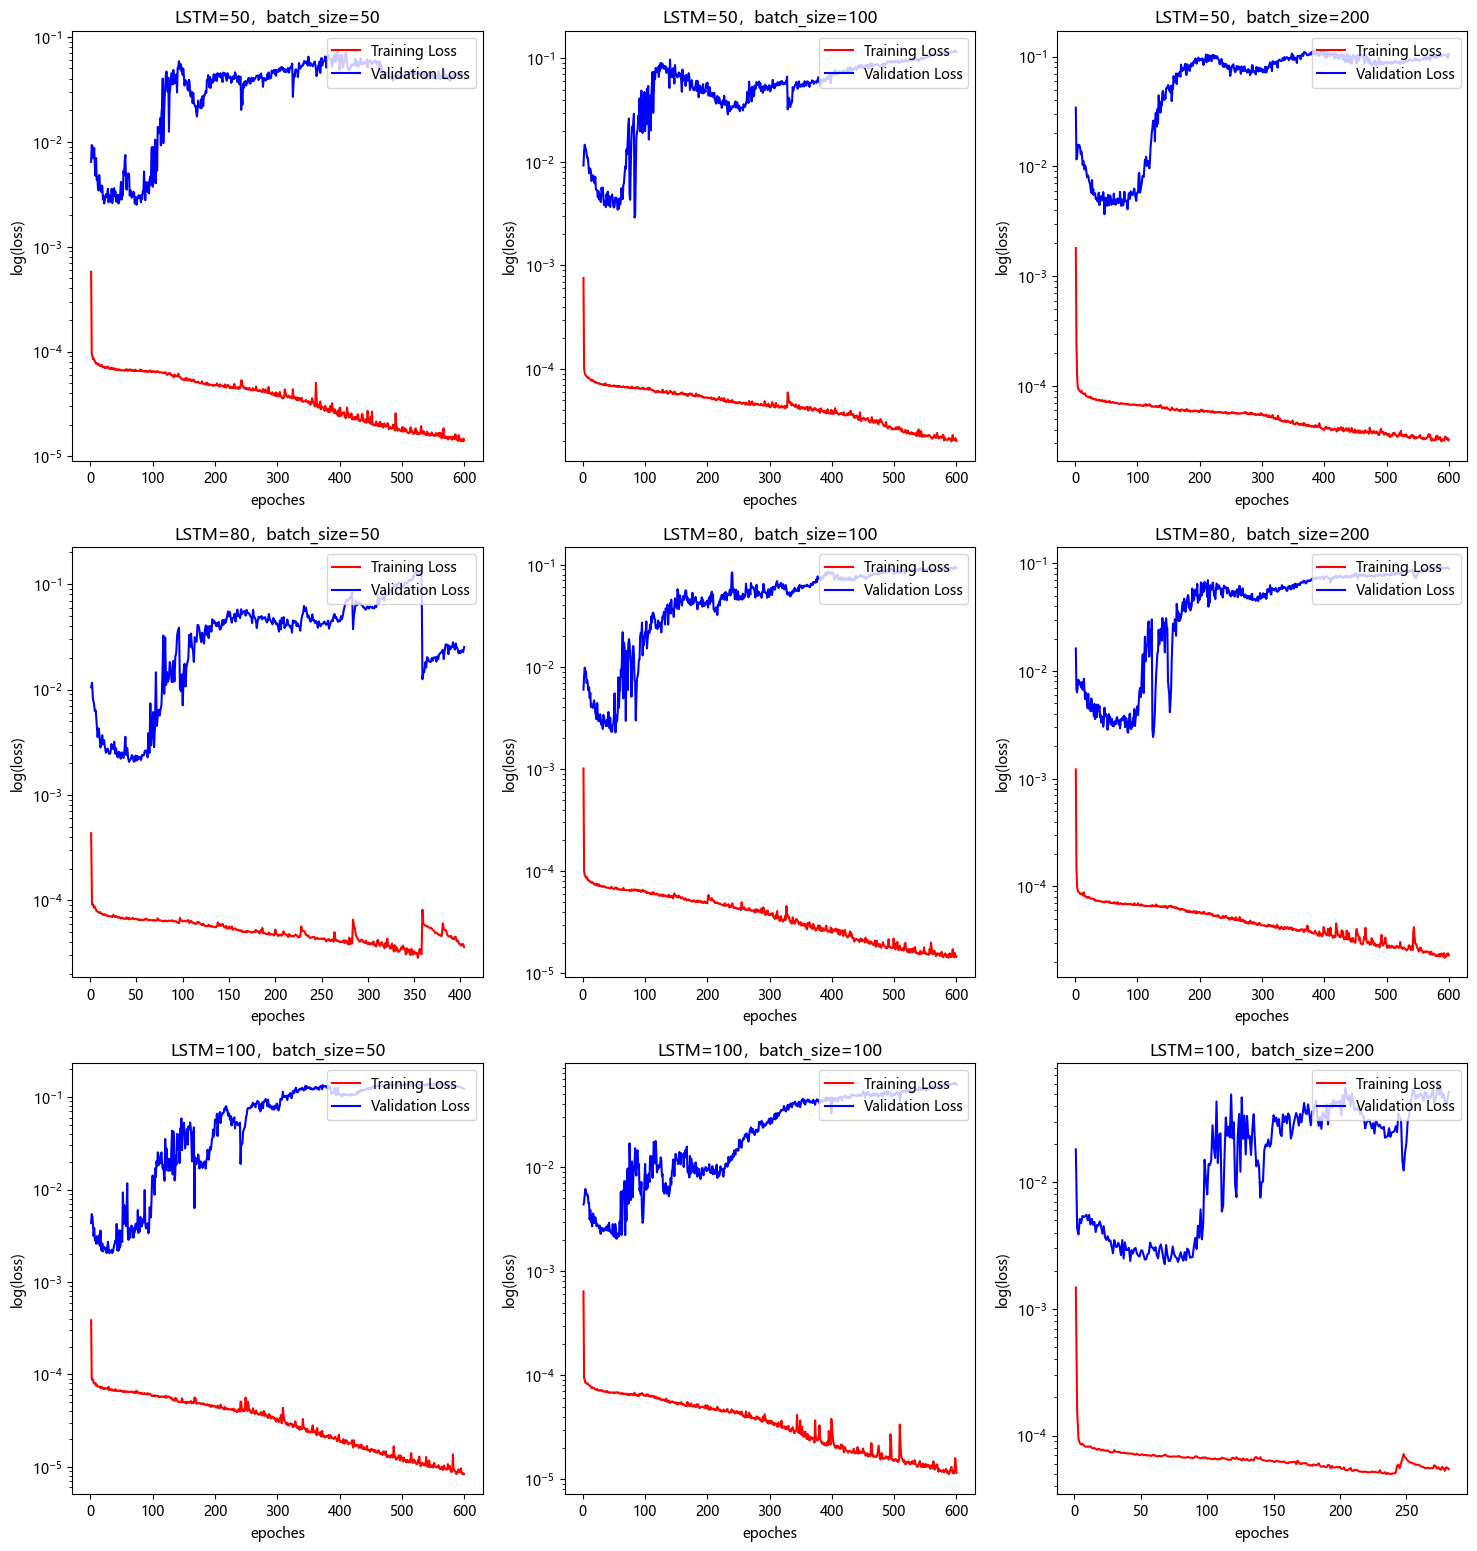

In [42]:
#调参过程可视化
#不同参数取值下epoches - log(loss)图
fig4,axes4 = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
for i in range(3):
    for j in range(3):
        axes4[i,j].semilogy(df_LSTM_result_multi["epochs"],df_LSTM_result_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])+"  loss"],"r")
        axes4[i,j].semilogy(df_LSTM_result_multi["epochs"],df_LSTM_result_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])+"  val_loss"],"b")
        axes4[i,j].legend(["Training Loss","Validation Loss"],loc = 1)
        axes4[i,j].set_title("LSTM="+str(LSTM_layers_selection_multi[i])+"，batch_size="+str(batch_size_selection_multi[j]))
        axes4[i,j].set_xlabel('epoches')
        axes4[i,j].set_ylabel('log(loss)')

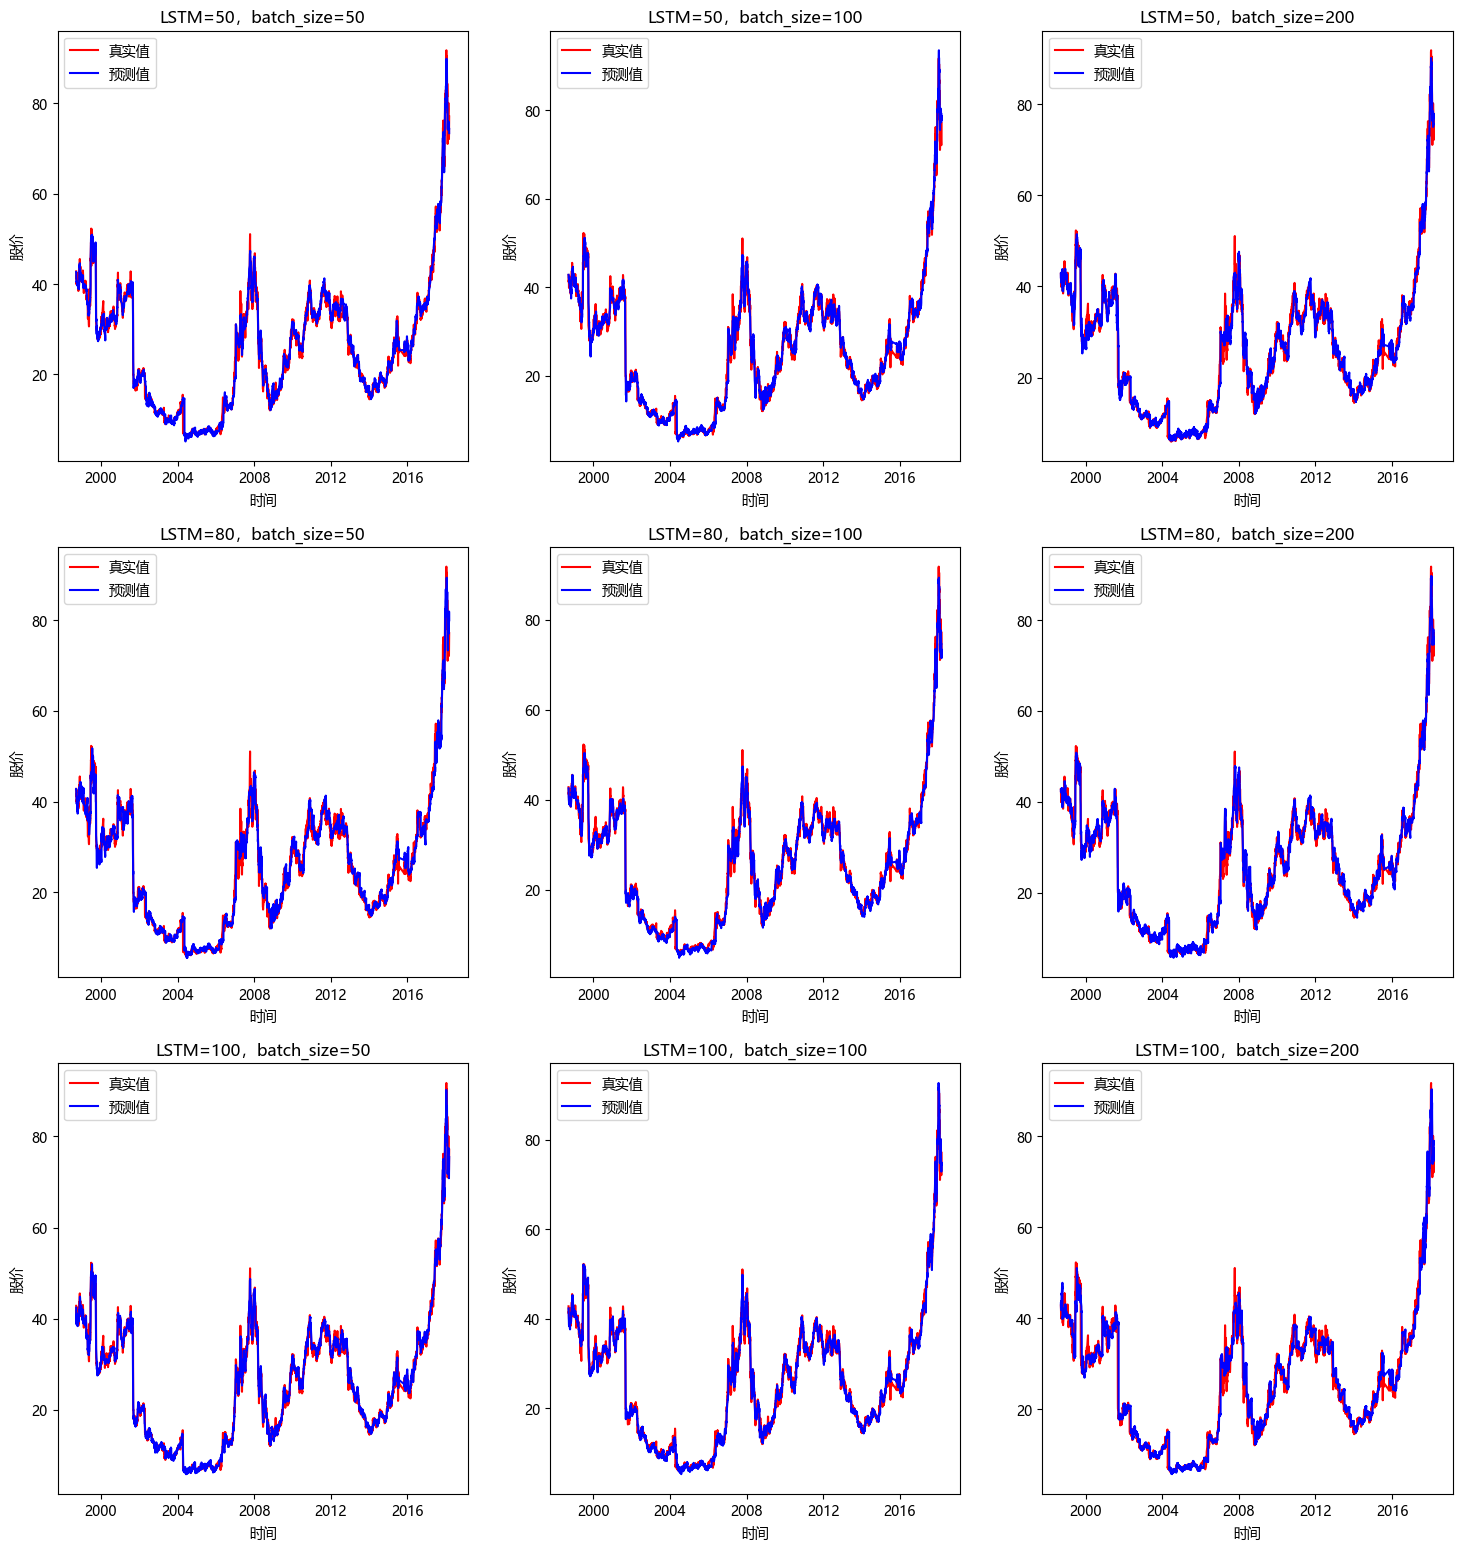

In [43]:
#不同参数取值下训练集预测值和真实值图
fig5,axes5 = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
train_data_LSTM_table_multi = df_stock["收盘价"].iloc[100:20*(int(len(df_stock)*0.8)//20)]
for i in range(3):
    for j in range(3):
        train_predict_table_multi = pd.DataFrame(df_LSTM_trainpre_result_multi["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])])
        axes5[i,j].plot(train_data_LSTM_table_multi,"r")
        axes5[i,j].plot(train_predict_table_multi,"b")
        axes5[i,j].legend(["真实值","预测值"],loc = 2)
        axes5[i,j].set_title("LSTM="+str(LSTM_layers_selection_multi[i])+"，batch_size="+str(batch_size_selection_multi[j]))
        axes5[i,j].set_xlabel('时间')
        axes5[i,j].set_ylabel('股价')

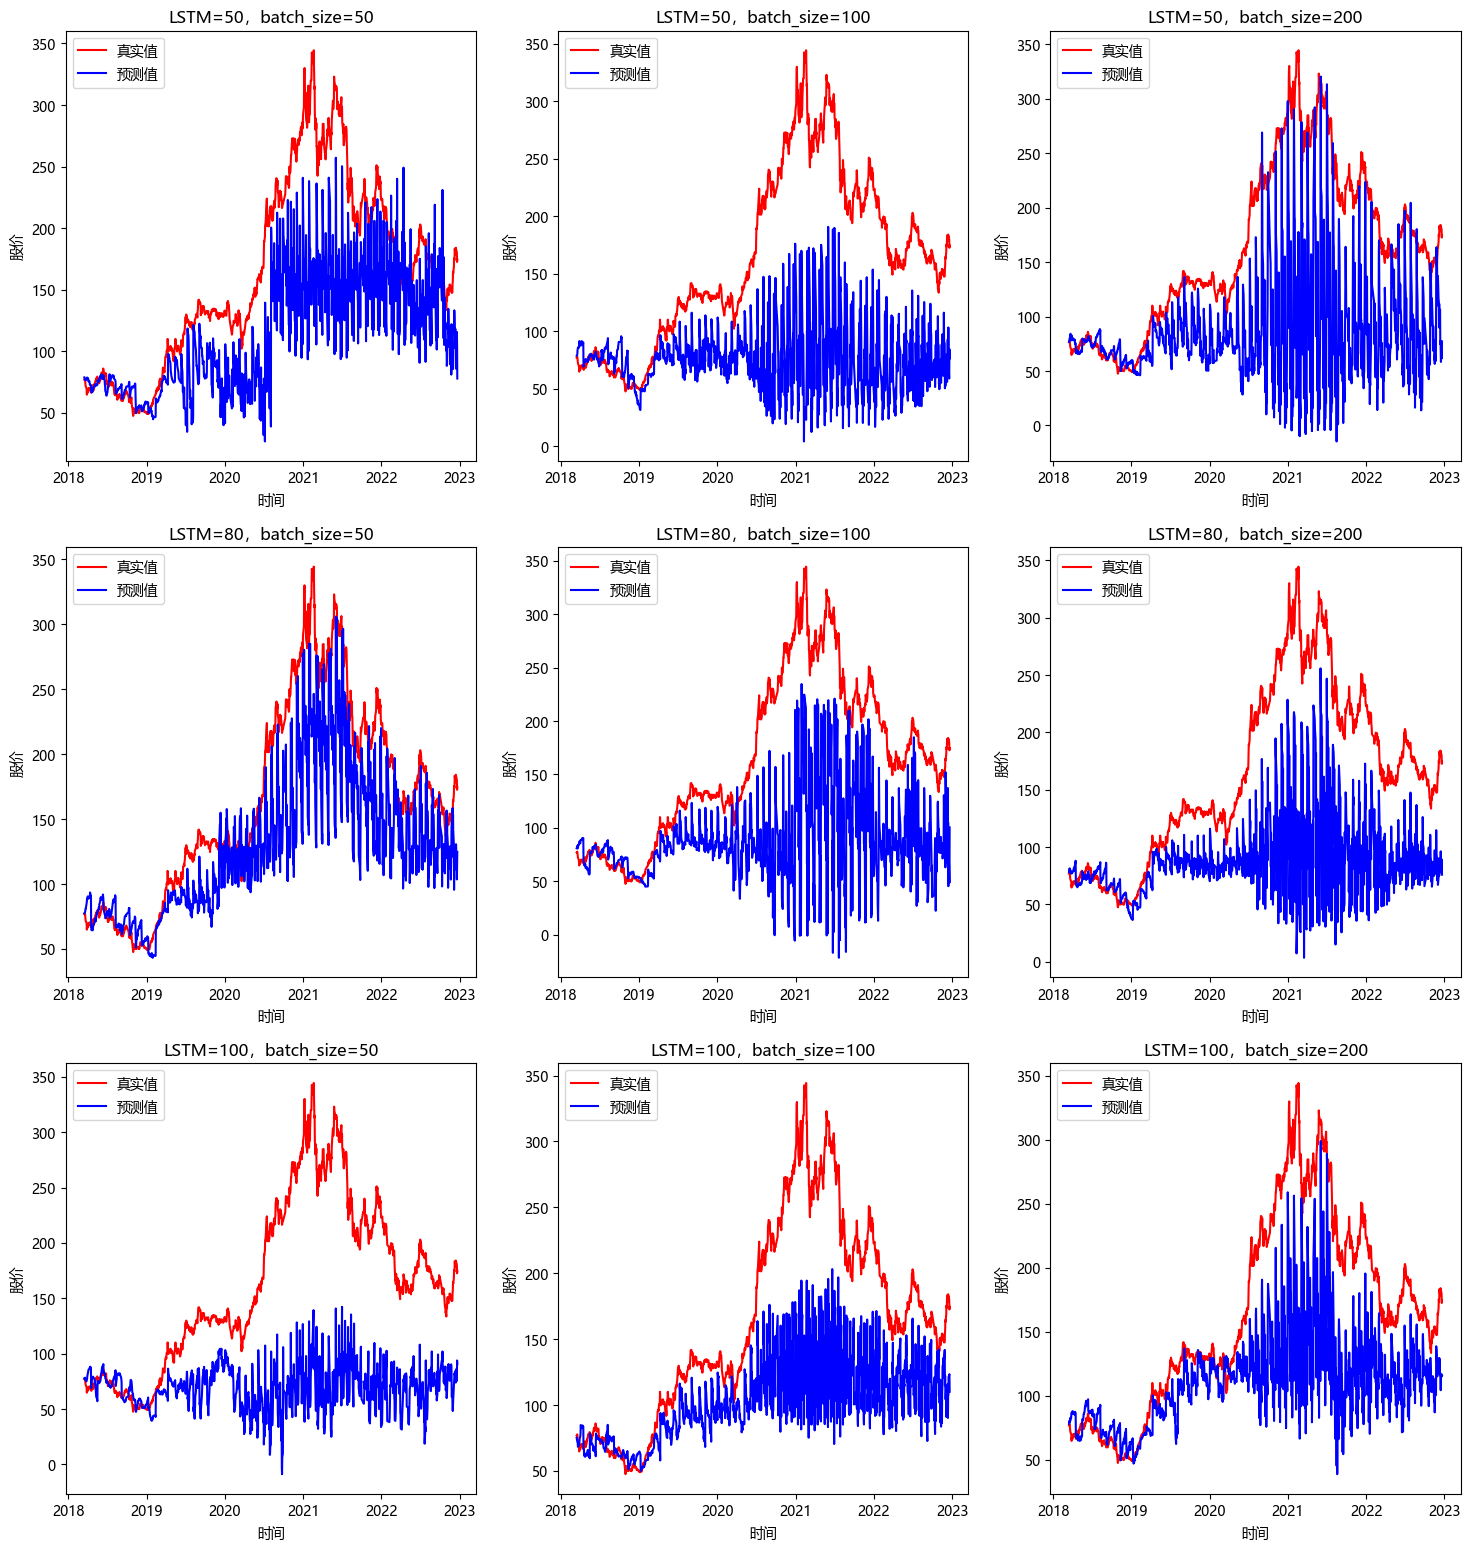

In [44]:
#不同参数取值下测试集预测值和真实值图
fig6,axes6 = plt.subplots(3,3,figsize=(18,19))  #设置图像大小
test_data_LSTM_table_multi = df_stock["收盘价"].iloc[int(len(df_stock)*0.8):int(len(df_stock)*0.8)+20*((len(df_stock)-int(len(df_stock)*0.8))//20)]
for i in range(3):
    for j in range(3):
        test_predict_table_multi = pd.DataFrame(df_LSTM_testpre_result_multi["LSTM="+str(LSTM_layers_selection[i])+",batch_size="+str(batch_size_selection[j])])
        axes6[i,j].plot(test_data_LSTM_table_multi,"r")
        axes6[i,j].plot(test_predict_table_multi,"b")
        axes6[i,j].legend(["真实值","预测值"],loc = 2)
        axes6[i,j].set_title("LSTM="+str(LSTM_layers_selection_multi[i])+"，batch_size="+str(batch_size_selection_multi[j]))
        axes6[i,j].set_xlabel('时间')
        axes6[i,j].set_ylabel('股价')

In [45]:
#观察图像可看出：在训练epoches为600的情况下，training loss并未收敛，尽管由训练集预测图可知训练结果尚可，但预测结果并不好
#同样的计算训练集预测结果的均方误差作为参数选取标准
df_MSE_multi = pd.DataFrame()
df_LSTM_trainpre_result_copy_multi = df_LSTM_trainpre_result_multi.copy(deep = True)
df_LSTM_trainpre_result_copy_multi["真实值"] = list(df_stock["收盘价"].iloc[100:20*(int(len(df_stock)*0.8)//20)])
for i in range(3):
    for j in range(3):
        df_LSTM_trainpre_result_copy_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])] = df_LSTM_trainpre_result_copy_multi.apply(lambda x: x["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])] - x["真实值"], axis = 1)
        df_LSTM_trainpre_result_copy_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])] = df_LSTM_trainpre_result_copy_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])].apply(lambda x: x**2)
        df_MSE_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])] = [sum(df_LSTM_trainpre_result_copy_multi["LSTM="+str(LSTM_layers_selection_multi[i])+",batch_size="+str(batch_size_selection_multi[j])])/df_LSTM_trainpre_result_copy_multi.shape[0]]
df_MSE_multi

LSTM=50,batch_size=50  LSTM=50,batch_size=100  LSTM=50,batch_size=200  \
0               1.619584                2.392203                3.774086   

   LSTM=80,batch_size=50  LSTM=80,batch_size=100  LSTM=80,batch_size=200  \
0               3.977805                1.752797                2.842203   

   LSTM=100,batch_size=50  LSTM=100,batch_size=100  LSTM=100,batch_size=200  
0                0.904896                 1.400637                 6.164564

In [46]:
#选取训练集预测结果的均方误差最小值对应的参数为模型的参数
print("多变量LSTM模型训练集预测结果的均方误差最小值对应的模型参数为：",df_MSE_multi.idxmin(axis = 1)[0])

多变量LSTM模型训练集预测结果的均方误差最小值对应的模型参数为： LSTM=100,batch_size=50


<function matplotlib.pyplot.show(close=None, block=None)>

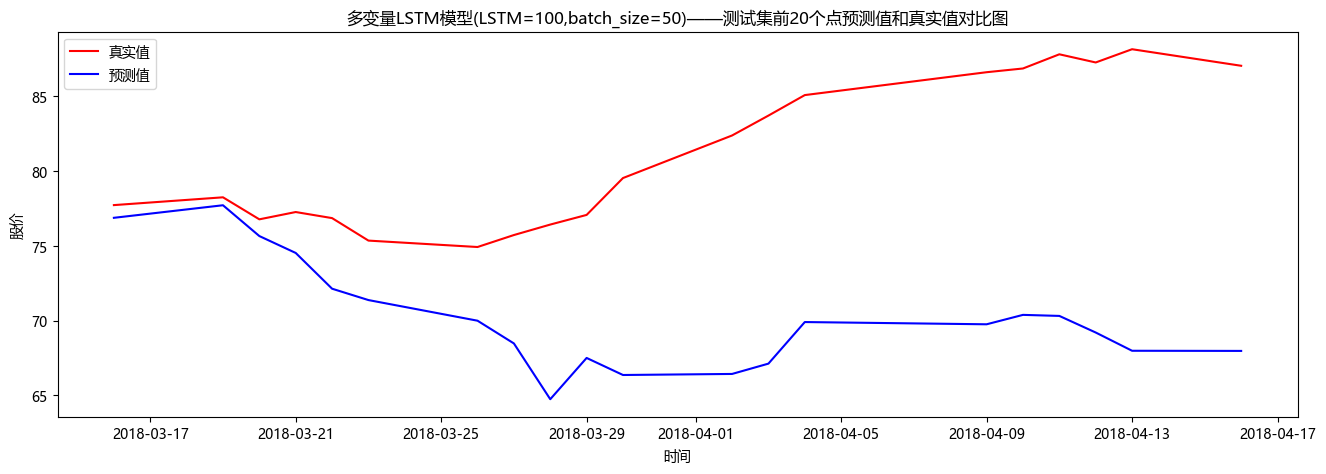

In [47]:
#预测测试集前20个点
#相比之下的最优参数为LSTM=100,batch_size=50
plt.figure(figsize=(16,5))
plt.plot(df_LSTM_testpre_result_multi["LSTM=100,batch_size=50"].iloc[:20],color='red')
plt.plot(df_stock["收盘价"][int(len(df_stock)*0.8):int(len(df_stock)*0.8)+20], color='blue')
plt.title("多变量LSTM模型(LSTM=100,batch_size=50)——测试集前20个点预测值和真实值对比图")
plt.xlabel("时间")
plt.ylabel("股价")
plt.legend(["真实值","预测值"])
plt.show

## 5.ARIMA(7,1,0)模型、单变量LSTM模型、多变量LSTM模型预测效果对比


In [48]:
#计算MSE函数
def MSE_calculation(prediction_set,truevalue_set):
    return sum((prediction_set-truevalue_set)**2)/20

#三种模型训练集前20个数据的预测值
ARIMA_pre = prediction4.iloc[:20].values.flatten()
LSTM_single = prediction5.iloc[:20].values.flatten()
LSTM_multi = df_LSTM_testpre_result_multi["LSTM=100,batch_size=50"].iloc[:20].values.flatten()

#训练集前20个数据的真实值
true_stock_value = df_stock["收盘价"][int(len(df_stock)*0.8):int(len(df_stock)*0.8)+20].values.flatten()

#显示结果
print("ARIMA(7,1,0)模型训练集前20个数据的预测均方误差为：",MSE_calculation(ARIMA_pre,true_stock_value))
print("单变量LSTM模型训练集前20个数据的预测均方误差为：",MSE_calculation(LSTM_single,true_stock_value))
print("多变量LSTM模型训练集前20个数据的预测均方误差为：",MSE_calculation(LSTM_multi,true_stock_value))

ARIMA(7,1,0)模型训练集前20个数据的预测均方误差为： 72.48848330393764
单变量LSTM模型训练集前20个数据的预测均方误差为： 16.36461524508349
多变量LSTM模型训练集前20个数据的预测均方误差为： 162.1543323705776
